## *Вступ до машинного навчання*
## *Лабораторна робота №3*
    
    
<p style="text-align: right;"> виконала: Немировська Вікторія </p>
<p style="text-align: right;"> група: ДА-01 </p>

In [1]:
#import libraries
import math
import numpy as np
import pandas as pd
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

pd.set_option("display.max_rows", 50)
pd.set_option("display.max_columns", 50)

# *Problem and features overview*

Набір даних містить інформацію про пасажирів та екіпаж, які перебували на пароплаві "Титанік".

![title](data_dictionary.png)

Колонки містять наступну інформацію:

- PassengerId - ідентифікатор пасажира
- Survived - чи вижив цей пасажир (0 - не вижив, 1 - вижив)
- Pclass - класс квитка (1 - перший > 2 - другий > 3 - третій)
- Name - ім'я пасажира
- Sex - стать пасажира
- Age - вік пасажира
- SibSp - сумарна кількість братів, сестер, чоловіків та дружин, які перебували пароплаві
- Parch - сумарна кількість родичів, дітей, які перебували пароплаві
- Ticket - номер квитка
- FareCabin - номер кабіни
- Embarked - порт, де відбулася посадка пасажира (C - Шербур, Q - Квінстаун, S - Саутгемптон)

Задачею є визначення чи залишився живим пасажир або член екіпажу, спираючись на надані про нього дані.

In [2]:
#load train dataset
train = pd.read_csv("train.csv")
train.sample(10)

PassengerId  Survived  Pclass   
569          570         1       3  \
104          105         0       3   
237          238         1       2   
848          849         0       2   
494          495         0       3   
744          745         1       3   
131          132         0       3   
435          436         1       1   
247          248         1       2   
571          572         1       1   

                                              Name     Sex   Age  SibSp   
569                              Jonsson, Mr. Carl    male  32.0      0  \
104                 Gustafsson, Mr. Anders Vilhelm    male  37.0      2   
237               Collyer, Miss. Marjorie "Lottie"  female   8.0      0   
848                              Harper, Rev. John    male  28.0      0   
494                     Stanley, Mr. Edward Roland    male  21.0      0   
744                             Stranden, Mr. Juho    male  31.0      0   
131                 Coelho, Mr. Domingos Fernandeo    male  20.0      0   
435                      Carter, Miss. Lucile Polk  female  14.0      1   
247                Hamalainen, Mrs. William (Anna)  female  24.0      0   
571  Appleton, Mrs. Edward Dale (Charlotte Lamson)  female  53.0      2   

     Parch              Ticket      Fare    Cabin Embarked  
569      0              350417    7.8542      NaN        S  
104      0             3101276    7.9250      NaN        S  
237      2          C.A. 31921   26.2500      NaN        S  
848      1              248727   33.0000      NaN        S  
494      0           A/4 45380    8.0500      NaN        S  
744      0   STON/O 2. 3101288    7.9250      NaN        S  
131      0  SOTON/O.Q. 3101307    7.0500      NaN        S  
435      2              113760  120.0000  B96 B98        S  
247      2              250649   14.5000      NaN        S  
571      0               11769   51.4792     C101        S

In [3]:
print("train dataset: ", train.shape)

train dataset:  (891, 12)


In [4]:
#load train dataset
test = pd.read_csv("test.csv")
test.sample(10)

PassengerId  Pclass                              Name     Sex   Age   
265         1157       3             Lyntakoff, Mr. Stanko    male   NaN  \
124         1016       3                 Kennedy, Mr. John    male   NaN   
162         1054       2              Wright, Miss. Marion  female  26.0   
221         1113       3            Reynolds, Mr. Harold J    male  21.0   
315         1207       3              Hagardon, Miss. Kate  female  17.0   
112         1004       1          Evans, Miss. Edith Corse  female  36.0   
1            893       3  Wilkes, Mrs. James (Ellen Needs)  female  47.0   
180         1072       2         McCrie, Mr. James Matthew    male  30.0   
205         1097       1         Omont, Mr. Alfred Fernand    male   NaN   
173         1065       3                  Torfa, Mr. Assad    male   NaN   

     SibSp  Parch       Ticket     Fare Cabin Embarked  
265      0      0       349235   7.8958   NaN        S  
124      0      0       368783   7.7500   NaN        Q  
162      0      0       220844  13.5000   NaN        S  
221      0      0       342684   8.0500   NaN        S  
315      0      0  AQ/3. 30631   7.7333   NaN        Q  
112      0      0     PC 17531  31.6792   A29        C  
1        1      0       363272   7.0000   NaN        S  
180      0      0       233478  13.0000   NaN        S  
205      0      0   F.C. 12998  25.7417   NaN        C  
173      0      0         2673   7.2292   NaN        C

In [5]:
print("test dataset: ", test.shape)

test dataset:  (418, 11)


З усіх фітч до категоріальних можна віднести: Survived, Name, Pclass, Sex, Ticket, Cabin, Embarked.

In [6]:
#set type "category" for categorical features
categorical_features = {"Pclass", "Name", "Sex", "Ticket", "Cabin", "Embarked"}

for feature in categorical_features:
    train[["Survived", feature]] = train[["Survived", feature]].astype("category")
    
for feature in categorical_features:
    test[feature] = test[feature].astype("category")
                        
numeric_features = train.select_dtypes(include = ["float64", "int64"]).columns

categorical_features = list(categorical_features)
numeric_features = list(numeric_features)

train.dtypes

PassengerId       int64
Survived       category
Pclass         category
Name           category
Sex            category
Age             float64
SibSp             int64
Parch             int64
Ticket         category
Fare            float64
Cabin          category
Embarked       category
dtype: object

# *Duplicates*

## *All features*

In [7]:
#getting duplicated rows in train dataset
train[train.duplicated()]

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []

In [8]:
#getting duplicated rows in test dataset
test[test.duplicated()]

Empty DataFrame
Columns: [PassengerId, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []

Тренувальний та тестовий набори даних не мають дуплікованих рядків.

## *Name*

In [9]:
train[train["Name"].duplicated()]

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []

Повторень імен також немає, проте є повторення прізвищ. Люди з однаковими прізвищами можуть бути сім'єю, або просто однофамільцями.

### *Surname train dataset*

In [10]:
train.sort_values("Name")

PassengerId Survived Pclass                                   Name   
845          846        0      3                    Abbing, Mr. Anthony  \
746          747        0      3            Abbott, Mr. Rossmore Edward   
279          280        1      3       Abbott, Mrs. Stanton (Rosa Hunt)   
308          309        0      2                    Abelson, Mr. Samuel   
874          875        1      2  Abelson, Mrs. Samuel (Hannah Wizosky)   
..           ...      ...    ...                                    ...   
286          287        1      3                de Mulder, Mr. Theodore   
282          283        0      3              de Pelsmaeker, Mr. Alfons   
361          362        0      2              del Carlo, Mr. Sebastiano   
153          154        0      3        van Billiard, Mr. Austin Blyler   
868          869        0      3            van Melkebeke, Mr. Philemon   

        Sex   Age  SibSp  Parch         Ticket     Fare Cabin Embarked  
845    male  42.0      0      0      C.A. 5547   7.5500   NaN        S  
746    male  16.0      1      1      C.A. 2673  20.2500   NaN        S  
279  female  35.0      1      1      C.A. 2673  20.2500   NaN        S  
308    male  30.0      1      0      P/PP 3381  24.0000   NaN        C  
874  female  28.0      1      0      P/PP 3381  24.0000   NaN        C  
..      ...   ...    ...    ...            ...      ...   ...      ...  
286    male  30.0      0      0         345774   9.5000   NaN        S  
282    male  16.0      0      0         345778   9.5000   NaN        S  
361    male  29.0      1      0  SC/PARIS 2167  27.7208   NaN        C  
153    male  40.5      0      2       A/5. 851  14.5000   NaN        S  
868    male   NaN      0      0         345777   9.5000   NaN        S  

[891 rows x 12 columns]

## *Ticket*

In [11]:
train[train["Ticket"].duplicated()].sort_values("Ticket")

PassengerId Survived Pclass   
504          505        1      1  \
759          760        1      1   
558          559        1      1   
585          586        1      1   
475          476        0      1   
..           ...      ...    ...   
888          889        0      3   
147          148        0      3   
436          437        0      3   
736          737        0      3   
745          746        0      1   

                                                  Name     Sex   Age  SibSp   
504                              Maioni, Miss. Roberta  female  16.0      0  \
759  Rothes, the Countess. of (Lucy Noel Martha Dye...  female  33.0      0   
558             Taussig, Mrs. Emil (Tillie Mandelbaum)  female  39.0      1   
585                                Taussig, Miss. Ruth  female  18.0      0   
475                        Clifford, Mr. George Quincy    male   NaN      0   
..                                                 ...     ...   ...    ...   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
147                   Ford, Miss. Robina Maggie "Ruby"  female   9.0      2   
436               Ford, Miss. Doolina Margaret "Daisy"  female  21.0      2   
736            Ford, Mrs. Edward (Margaret Ann Watson)  female  48.0      1   
745                       Crosby, Capt. Edward Gifford    male  70.0      1   

     Parch      Ticket    Fare Cabin Embarked  
504      0      110152  86.500   B79        S  
759      0      110152  86.500   B77        S  
558      1      110413  79.650   E67        S  
585      2      110413  79.650   E68        S  
475      0      110465  52.000   A14        S  
..     ...         ...     ...   ...      ...  
888      2  W./C. 6607  23.450   NaN        S  
147      2  W./C. 6608  34.375   NaN        S  
436      2  W./C. 6608  34.375   NaN        S  
736      3  W./C. 6608  34.375   NaN        S  
745      1   WE/P 5735  71.000   B22        S  

[210 rows x 12 columns]

Можна побачити, що декілька пасажирів ділять між собою один квиток.

## *Cabin*

In [12]:
train[train["Cabin"].duplicated()]

PassengerId Survived Pclass   
2              3        1      3  \
4              5        0      3   
5              6        0      3   
7              8        0      3   
8              9        1      3   
..           ...      ...    ...   
884          885        0      3   
885          886        0      3   
886          887        0      2   
888          889        0      3   
890          891        0      3   

                                                  Name     Sex   Age  SibSp   
2                               Heikkinen, Miss. Laina  female  26.0      0  \
4                             Allen, Mr. William Henry    male  35.0      0   
5                                     Moran, Mr. James    male   NaN      0   
7                       Palsson, Master. Gosta Leonard    male   2.0      3   
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
..                                                 ...     ...   ...    ...   
884                             Sutehall, Mr. Henry Jr    male  25.0      0   
885               Rice, Mrs. William (Margaret Norton)  female  39.0      0   
886                              Montvila, Rev. Juozas    male  27.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
2        0  STON/O2. 3101282   7.9250   NaN        S  
4        0            373450   8.0500   NaN        S  
5        0            330877   8.4583   NaN        Q  
7        1            349909  21.0750   NaN        S  
8        2            347742  11.1333   NaN        S  
..     ...               ...      ...   ...      ...  
884      0   SOTON/OQ 392076   7.0500   NaN        S  
885      5            382652  29.1250   NaN        Q  
886      0            211536  13.0000   NaN        S  
888      2        W./C. 6607  23.4500   NaN        S  
890      0            370376   7.7500   NaN        Q  

[743 rows x 12 columns]

In [13]:
train[train["Cabin"].duplicated() & train["Cabin"].notna()].sort_values("Cabin")

PassengerId Survived Pclass   
523          524        1      1  \
781          782        1      1   
745          746        0      1   
829          830        1      1   
641          642        1      1   
..           ...      ...    ...   
345          346        1      2   
618          619        1      2   
251          252        0      3   
394          395        1      3   
205          206        0      3   

                                                  Name     Sex   Age  SibSp   
523    Hippach, Mrs. Louis Albert (Ida Sophia Fischer)  female  44.0      0  \
781          Dick, Mrs. Albert Adrian (Vera Gillespie)  female  17.0      1   
745                       Crosby, Capt. Edward Gifford    male  70.0      1   
829          Stone, Mrs. George Nelson (Martha Evelyn)  female  62.0      0   
641                               Sagesser, Mlle. Emma  female  24.0      0   
..                                                 ...     ...   ...    ...   
345                      Brown, Miss. Amelia "Mildred"  female  24.0      0   
618                        Becker, Miss. Marion Louise  female   4.0      2   
251         Strom, Mrs. Wilhelm (Elna Matilda Persson)  female  29.0      1   
394  Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...  female  24.0      0   
205                         Strom, Miss. Telma Matilda  female   2.0      0   

     Parch     Ticket     Fare Cabin Embarked  
523      1     111361  57.9792   B18        C  
781      0      17474  57.0000   B20        S  
745      1  WE/P 5735  71.0000   B22        S  
829      0     113572  80.0000   B28      NaN  
641      0   PC 17477  69.3000   B35        C  
..     ...        ...      ...   ...      ...  
345      0     248733  13.0000   F33        S  
618      1     230136  39.0000    F4        S  
251      1     347054  10.4625    G6        S  
394      2    PP 9549  16.7000    G6        S  
205      1     347054  10.4625    G6        S  

[57 rows x 12 columns]

Також є повторення одних і тих самих кабінок у різних пасажирів, тобто деякі пасажири перебували на борту в одній кабіні. Можливо наявність сусіда може підвищити ймовірність виживання.

# *Missing values*

In [14]:
#getting missing values in train and test set
print("-"*20)
print("Train set size: %d\n" % len(train))
print("Missing values:")
print(train.isnull().sum())
print("\n")
print("-"*20)
print("Test set size: %d\n" % len(test))
print("Missing values:")
print(test.isnull().sum())

--------------------
Train set size: 891

Missing values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


--------------------
Test set size: 418

Missing values:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


### *Cabin*
У тренувальному наборі даних кількість пропущених значень складає $687$ рядків ($77.1$%), а в тестувальному - $327$ ($78.2$%). Відсутніх даних у цій колонці надто багато, тому краще її вилучити.

### *Age*
Для заповнення змінної Age можна спробувати використати дані про кількість братів, сестер, партнерів (SibSp) та батьків, дітей (Parch) на борту.

### *Embarked*
У тренувальному наборі даних відсутні всього два значення про місце відправки. Ці значення можна заповнити модою.

In [15]:
train["Embarked"] = train["Embarked"].fillna(train["Embarked"].mode()[0])

### *Fare*
У тестовому наборі відсутнє одне значення щодо вартості квитка. Його можна заповнити середнім значенням вартості квитка відповідного класу.

In [16]:
test[test["Fare"].isna()]

PassengerId Pclass                Name   Sex   Age  SibSp  Parch Ticket   
152         1044      3  Storey, Mr. Thomas  male  60.5      0      0   3701  \

     Fare Cabin Embarked  
152   NaN   NaN        S

In [17]:
mean = test[test["Pclass"] == 3]["Fare"].mean()
test["Fare"] = test["Fare"].fillna(mean)

In [18]:
#getting missing values in train and test set
print("-"*20)
print("Train set size: %d\n" % len(train))
print("Missing values:")
print(train.isnull().sum())
print("\n")
print("-"*20)
print("Test set size: %d\n" % len(test))
print("Missing values:")
print(test.isnull().sum())

--------------------
Train set size: 891

Missing values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


--------------------
Test set size: 418

Missing values:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


Залишилося заповнити лише пропущені значення щодо віку пасажира.

# *Distributions*

In [19]:
train.describe(include="all")

PassengerId  Survived  Pclass                 Name   Sex         Age   
count    891.000000     891.0   891.0                  891   891  714.000000  \
unique          NaN       2.0     3.0                  891     2         NaN   
top             NaN       0.0     3.0  Abbing, Mr. Anthony  male         NaN   
freq            NaN     549.0   491.0                    1   577         NaN   
mean     446.000000       NaN     NaN                  NaN   NaN   29.699118   
std      257.353842       NaN     NaN                  NaN   NaN   14.526497   
min        1.000000       NaN     NaN                  NaN   NaN    0.420000   
25%      223.500000       NaN     NaN                  NaN   NaN   20.125000   
50%      446.000000       NaN     NaN                  NaN   NaN   28.000000   
75%      668.500000       NaN     NaN                  NaN   NaN   38.000000   
max      891.000000       NaN     NaN                  NaN   NaN   80.000000   

             SibSp       Parch Ticket        Fare        Cabin Embarked  
count   891.000000  891.000000    891  891.000000          204      891  
unique         NaN         NaN    681         NaN          147        3  
top            NaN         NaN   1601         NaN  C23 C25 C27        S  
freq           NaN         NaN      7         NaN            4      646  
mean      0.523008    0.381594    NaN   32.204208          NaN      NaN  
std       1.102743    0.806057    NaN   49.693429          NaN      NaN  
min       0.000000    0.000000    NaN    0.000000          NaN      NaN  
25%       0.000000    0.000000    NaN    7.910400          NaN      NaN  
50%       0.000000    0.000000    NaN   14.454200          NaN      NaN  
75%       1.000000    0.000000    NaN   31.000000          NaN      NaN  
max       8.000000    6.000000    NaN  512.329200          NaN      NaN

Кількість людей визначених як "не виживли" становить $549$ ($61.6$%), котрі вижили - $342$ ($38.4$%), тому дані можна вважати збалансованими.

<Axes: xlabel='Survived', ylabel='Count'>

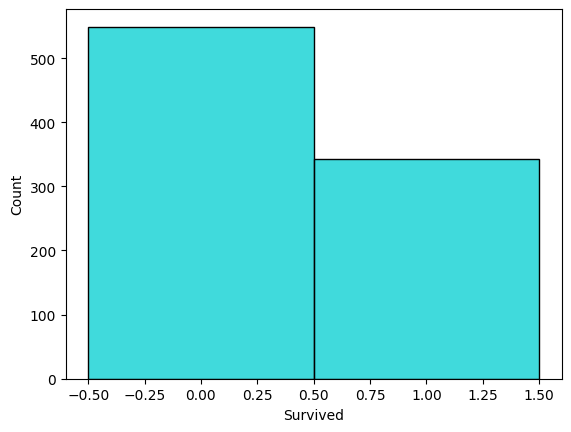

In [20]:
sns.histplot(train["Survived"], color="darkturquoise")

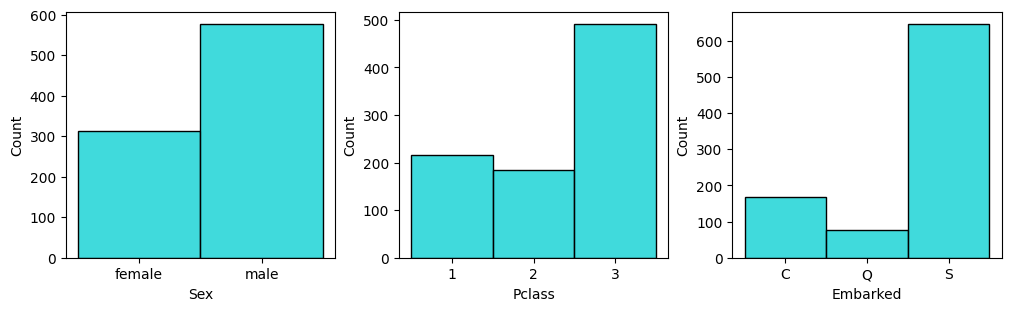

In [21]:
cat_plot_features = list({"Pclass", "Sex", "Embarked"})
fig, axes = plt.subplots(nrows=1, ncols=len(cat_plot_features), figsize=(10, 3), layout="constrained")

for i, ax in enumerate(axes.flat):
    sns.histplot(train[cat_plot_features][cat_plot_features[i]], ax=ax, color="darkturquoise")

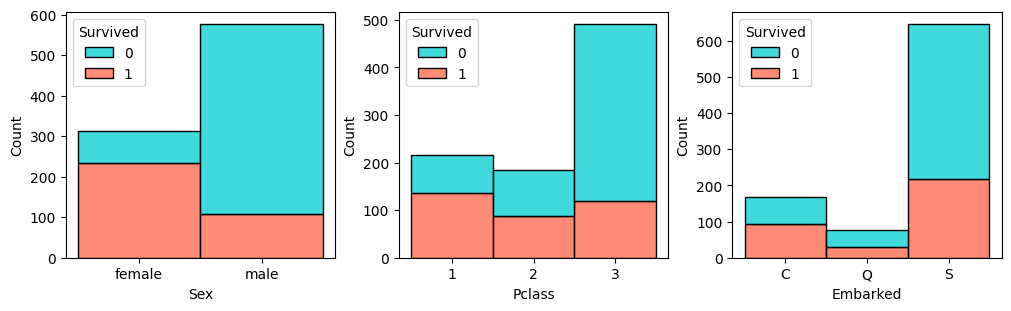

In [22]:
cat_plot_features = list({"Pclass", "Sex", "Embarked"})
sns.set_palette(sns.color_palette(["darkturquoise", "tomato"]))
fig, axes = plt.subplots(nrows=1, ncols=len(cat_plot_features), figsize=(10, 3), layout="constrained")

for i, ax in enumerate(axes.flat):
    sns.histplot(data=train, x=train[cat_plot_features][cat_plot_features[i]], ax=ax,
                 color="darkturquoise", hue="Survived", multiple="stack")

На наведеному вище графіку можна побачити, що серед першого класу у відсотковому співвідношені набагато більше виживших ніж серед другого. Частина виживших, які мали квитки третього класу є найменшою. Така тенденція може бути пов'язана зі соціальним статусом пасажирів, а також з розташуванням кабінок на палубах для відповідного класу. Наприклад, каюти та громадські приміщення для першого класу знаходилися вище та простягалися від палуби G до A (ближче до носа пароплава). Другий та третій класи перебували на палубах від G до D і були розташовані нижче. У той самий час шлюпки знаходилися на носу корабля і на кормовій частині (туди скоріш за все прямували люди з палуб G-D). Також варто відміти, що людям, які перебували у кабінах нижчого класу, було важче вибратися, оскільки знаходилися нижче. Розподіл шлюпок був однаковий, проте кількість пасажирів третього класу є більшою, тому багатьом просто не вистачило місця.

Серед виживших багато жінок. Можна зробити висновок, що пріоритетом для порятунку були жінки і діти.

Порт, звідки відбувалася посадка в принципі не має впливати на виживання тієї чи іншої людини, хоча можна побачити, що за відсотковим слкадом виживших значно менше серед пасажирів з Саутгемптона.

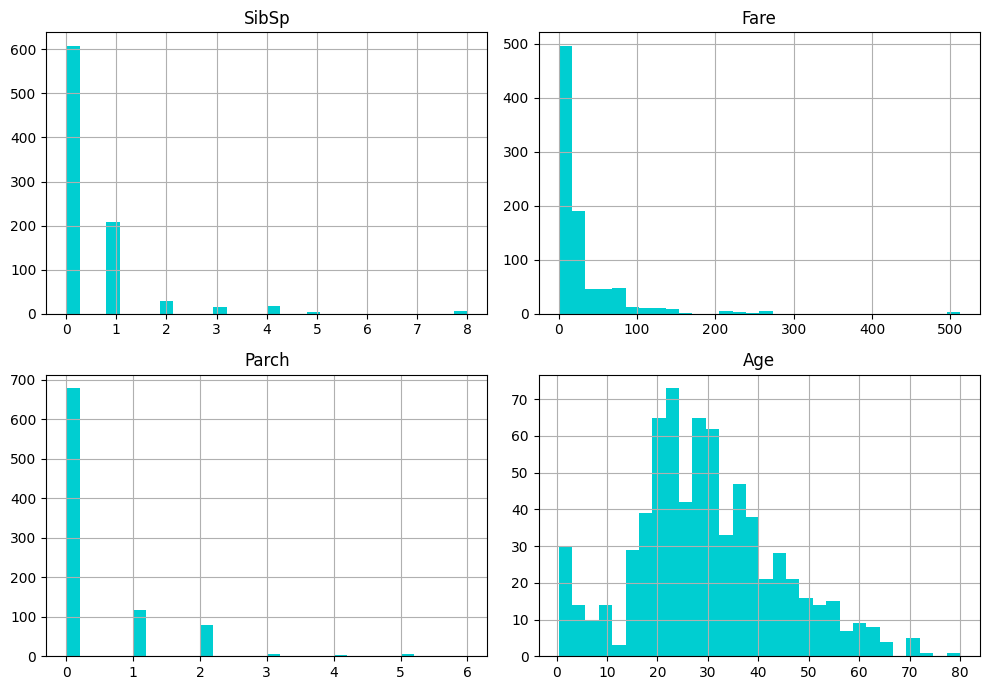

In [23]:
num_plot_features = list({"Age", "SibSp", "Parch", "Fare"})
hist_plt = train[num_plot_features].hist(figsize=(10, 7), color = "darkturquoise", bins=30,
                                        layout=(math.ceil(len(num_plot_features)/2), 2))
plt.tight_layout()

Можна зазначити, що на пароплаві було багато молоді та дітей. Розподіл віку схожий на нормальний розподіл.

Більшість людей їхали за найдешевшими квитками, що цілком відповідає розподілу за класами.

## *Log-normal Fare*

### *Train Fare*

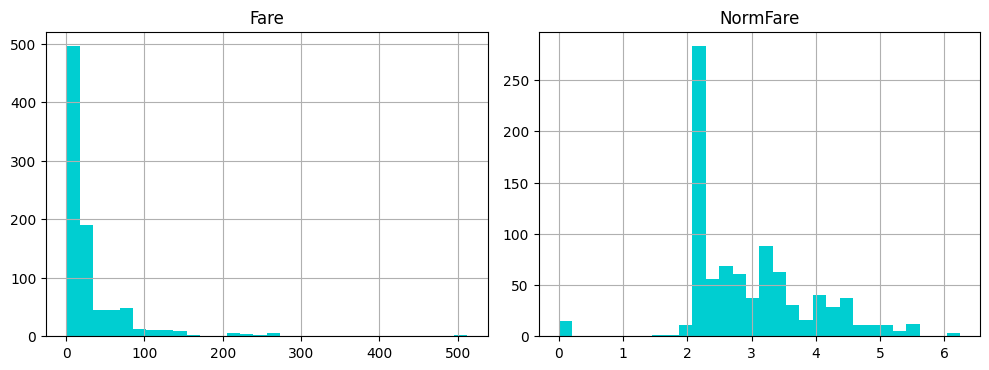

In [24]:
#make log-normal distribution for Fare
numeric_features.append("NormFare")
train["NormFare"] = np.log(train["Fare"] + 1)

num_plot_features = list({"Fare", "NormFare"})
hist_plt = train[num_plot_features].hist(figsize=(10, 7), color = "darkturquoise", bins=30,
                                        layout=(math.ceil(len(num_plot_features)/1), 2))
plt.tight_layout()

### *Test Fare*

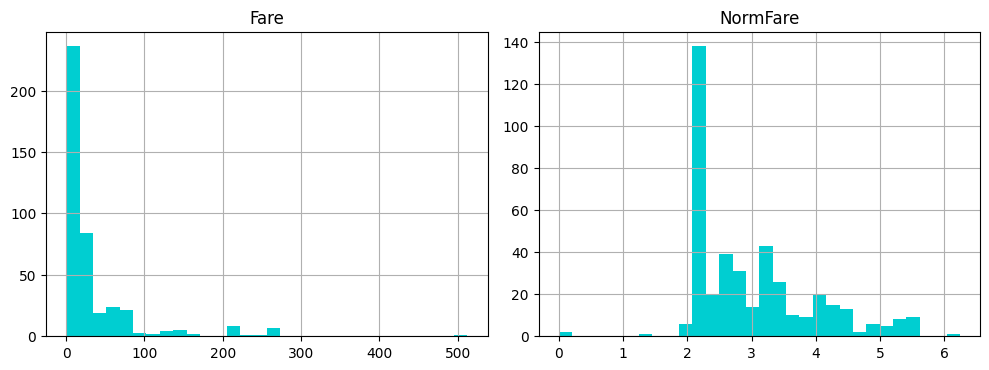

In [25]:
test["NormFare"] = np.log(test["Fare"] + 1)

num_plot_features = list({"Fare", "NormFare"})
hist_plt = test[num_plot_features].hist(figsize=(10, 7), color = "darkturquoise", bins=30,
                                        layout=(math.ceil(len(num_plot_features)/1), 2))
plt.tight_layout()

# *Outliers*

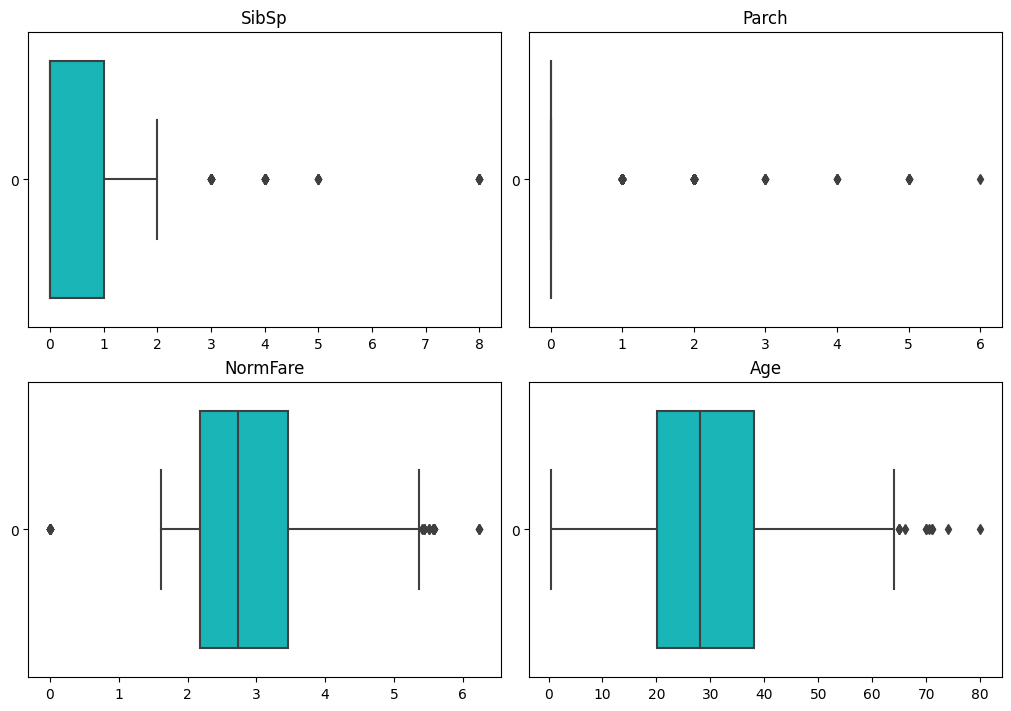

In [26]:
num_plot_features = list({"Age", "SibSp", "Parch", "NormFare"})
fig, axes = plt.subplots(nrows=math.ceil(len(num_plot_features)/2), ncols=2, figsize=(10, 7), layout="constrained")

for i, ax in enumerate(axes.flat):
    if(i<len(num_plot_features)):
        sns.boxplot(data=train[num_plot_features][num_plot_features[i]], orient="h",
                    ax=ax, color="darkturquoise").set_title(num_plot_features[i])

Дані аутлаєри не є помилковими даними, тому вони не потребують редагування.

# *Correlation*

## *Numeric*

<Axes: >

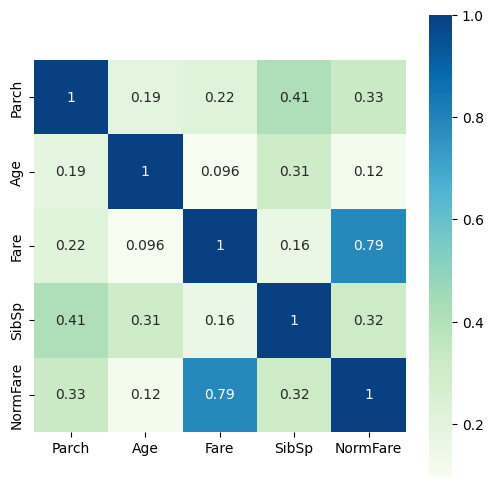

In [27]:
num_plot_features = list({"Age", "SibSp", "Parch", "Fare", "NormFare"})
corr_mat = train[num_plot_features].corr().abs()
mask = np.array(corr_mat)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(6, 6)
sns.heatmap(corr_mat, cmap="GnBu", square=True, annot=True)

## *Categorical*

In [28]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

<Axes: >

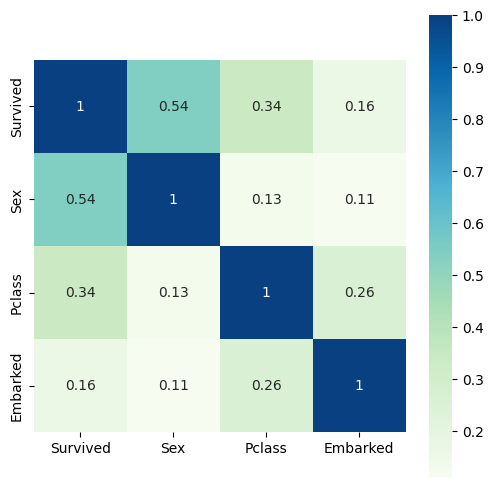

In [29]:
cat_plot_features = list({"Survived", "Pclass", "Sex", "Embarked"})
categorical = train[cat_plot_features]
cat_corr_df = pd.DataFrame()

for i in range(len(cat_plot_features)):
    for j in range (i, len(cat_plot_features)):
        x = list(cat_plot_features)[i]
        y = list(cat_plot_features)[j]
        corr = cramers_v(categorical[x], categorical[y])
        cat_corr_df.loc[x, y] = corr
        cat_corr_df.loc[y, x] = corr
        
mask = np.array(cat_corr_df)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(6, 6)
sns.heatmap(cat_corr_df, cmap="GnBu", square=True, annot=True)

# *Feature engineering*

## *Neighbours in cabin*
Як було зазначено раніше, наявність сусідів по кабіні може вплинути на виживання пасажира, оскільки разом люди могли допомагати один одному. Для цього можна сформувати колонку *CabinNeighb*, яка буде містити $1$ - якщо є хоча б один сусід і $0$ - якщо немає сусідів по кабіні.

In [30]:
all_data = pd.concat([train.loc[:, train.columns != "Survived"], test])
cabin_dupl = all_data[all_data["Cabin"].notna() & all_data["Cabin"].duplicated()]["Cabin"]

train["CabinNeighb"] = 0
test["CabinNeighb"] = 0

for i in set(cabin_dupl):
    train.loc[train["Cabin"] == i, "CabinNeighb"] = 1
    test.loc[test["Cabin"] == i, "CabinNeighb"] = 1

In [31]:
train["CabinNeighb"] = train["CabinNeighb"].astype("category")
test["CabinNeighb"] = test["CabinNeighb"].astype("category")
categorical_features.append("CabinNeighb")
train

PassengerId Survived Pclass   
0              1        0      3  \
1              2        1      1   
2              3        1      3   
3              4        1      1   
4              5        0      3   
..           ...      ...    ...   
886          887        0      2   
887          888        1      1   
888          889        0      3   
889          890        1      1   
890          891        0      3   

                                                  Name     Sex   Age  SibSp   
0                              Braund, Mr. Owen Harris    male  22.0      1  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  NormFare CabinNeighb  
0        0         A/5 21171   7.2500   NaN        S  2.110213           0  
1        0          PC 17599  71.2833   C85        C  4.280593           1  
2        0  STON/O2. 3101282   7.9250   NaN        S  2.188856           0  
3        0            113803  53.1000  C123        S  3.990834           1  
4        0            373450   8.0500   NaN        S  2.202765           0  
..     ...               ...      ...   ...      ...       ...         ...  
886      0            211536  13.0000   NaN        S  2.639057           0  
887      0            112053  30.0000   B42        S  3.433987           0  
888      2        W./C. 6607  23.4500   NaN        S  3.196630           0  
889      0            111369  30.0000  C148        C  3.433987           0  
890      0            370376   7.7500   NaN        Q  2.169054           0  

[891 rows x 14 columns]

In [32]:
test

PassengerId Pclass                                          Name     Sex   
0            892      3                              Kelly, Mr. James    male  \
1            893      3              Wilkes, Mrs. James (Ellen Needs)  female   
2            894      2                     Myles, Mr. Thomas Francis    male   
3            895      3                              Wirz, Mr. Albert    male   
4            896      3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   
..           ...    ...                                           ...     ...   
413         1305      3                            Spector, Mr. Woolf    male   
414         1306      1                  Oliva y Ocana, Dona. Fermina  female   
415         1307      3                  Saether, Mr. Simon Sivertsen    male   
416         1308      3                           Ware, Mr. Frederick    male   
417         1309      3                      Peter, Master. Michael J    male   

      Age  SibSp  Parch              Ticket      Fare Cabin Embarked   
0    34.5      0      0              330911    7.8292   NaN        Q  \
1    47.0      1      0              363272    7.0000   NaN        S   
2    62.0      0      0              240276    9.6875   NaN        Q   
3    27.0      0      0              315154    8.6625   NaN        S   
4    22.0      1      1             3101298   12.2875   NaN        S   
..    ...    ...    ...                 ...       ...   ...      ...   
413   NaN      0      0           A.5. 3236    8.0500   NaN        S   
414  39.0      0      0            PC 17758  108.9000  C105        C   
415  38.5      0      0  SOTON/O.Q. 3101262    7.2500   NaN        S   
416   NaN      0      0              359309    8.0500   NaN        S   
417   NaN      1      1                2668   22.3583   NaN        C   

     NormFare CabinNeighb  
0    2.178064           0  
1    2.079442           0  
2    2.369075           0  
3    2.268252           0  
4    2.586824           0  
..        ...         ...  
413  2.202765           0  
414  4.699571           0  
415  2.110213           0  
416  2.202765           0  
417  3.150952           0  

[418 rows x 13 columns]

## *Deck*
За номером кабінки можна визначити на якій палубі перебував пасажир.

Створимо колонку *Deck*.

In [33]:
train["Deck"] = train["Cabin"].apply(lambda x: x[0])
train

PassengerId Survived Pclass   
0              1        0      3  \
1              2        1      1   
2              3        1      3   
3              4        1      1   
4              5        0      3   
..           ...      ...    ...   
886          887        0      2   
887          888        1      1   
888          889        0      3   
889          890        1      1   
890          891        0      3   

                                                  Name     Sex   Age  SibSp   
0                              Braund, Mr. Owen Harris    male  22.0      1  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  NormFare CabinNeighb   
0        0         A/5 21171   7.2500   NaN        S  2.110213           0  \
1        0          PC 17599  71.2833   C85        C  4.280593           1   
2        0  STON/O2. 3101282   7.9250   NaN        S  2.188856           0   
3        0            113803  53.1000  C123        S  3.990834           1   
4        0            373450   8.0500   NaN        S  2.202765           0   
..     ...               ...      ...   ...      ...       ...         ...   
886      0            211536  13.0000   NaN        S  2.639057           0   
887      0            112053  30.0000   B42        S  3.433987           0   
888      2        W./C. 6607  23.4500   NaN        S  3.196630           0   
889      0            111369  30.0000  C148        C  3.433987           0   
890      0            370376   7.7500   NaN        Q  2.169054           0   

    Deck  
0    NaN  
1      C  
2    NaN  
3      C  
4    NaN  
..   ...  
886  NaN  
887    B  
888  NaN  
889    C  
890  NaN  

[891 rows x 15 columns]

In [34]:
test["Deck"] = test["Cabin"].apply(lambda x: x[0])
test

PassengerId Pclass                                          Name     Sex   
0            892      3                              Kelly, Mr. James    male  \
1            893      3              Wilkes, Mrs. James (Ellen Needs)  female   
2            894      2                     Myles, Mr. Thomas Francis    male   
3            895      3                              Wirz, Mr. Albert    male   
4            896      3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   
..           ...    ...                                           ...     ...   
413         1305      3                            Spector, Mr. Woolf    male   
414         1306      1                  Oliva y Ocana, Dona. Fermina  female   
415         1307      3                  Saether, Mr. Simon Sivertsen    male   
416         1308      3                           Ware, Mr. Frederick    male   
417         1309      3                      Peter, Master. Michael J    male   

      Age  SibSp  Parch              Ticket      Fare Cabin Embarked   
0    34.5      0      0              330911    7.8292   NaN        Q  \
1    47.0      1      0              363272    7.0000   NaN        S   
2    62.0      0      0              240276    9.6875   NaN        Q   
3    27.0      0      0              315154    8.6625   NaN        S   
4    22.0      1      1             3101298   12.2875   NaN        S   
..    ...    ...    ...                 ...       ...   ...      ...   
413   NaN      0      0           A.5. 3236    8.0500   NaN        S   
414  39.0      0      0            PC 17758  108.9000  C105        C   
415  38.5      0      0  SOTON/O.Q. 3101262    7.2500   NaN        S   
416   NaN      0      0              359309    8.0500   NaN        S   
417   NaN      1      1                2668   22.3583   NaN        C   

     NormFare CabinNeighb Deck  
0    2.178064           0  NaN  
1    2.079442           0  NaN  
2    2.369075           0  NaN  
3    2.268252           0  NaN  
4    2.586824           0  NaN  
..        ...         ...  ...  
413  2.202765           0  NaN  
414  4.699571           0    C  
415  2.110213           0  NaN  
416  2.202765           0  NaN  
417  3.150952           0  NaN  

[418 rows x 14 columns]

In [35]:
train["Deck"] = train["Deck"].astype("category")
test["Deck"] = test["Deck"].astype("category")
categorical_features.append("Deck")

# *Age missing values filling*
Для того щоб заповнити пропущені значення віку людей, спочатку визначимо за якими параметрами краще робити оцінку.

In [36]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

train_plt = train.copy()
ohe = OneHotEncoder()
ohe_train_plt = ohe.fit_transform(train_plt[["Embarked", "CabinNeighb", "Deck"]]).toarray()
ohe_train_plt = pd.DataFrame(ohe_train_plt, columns=ohe.get_feature_names_out())

ohe_train_plt = pd.concat([train_plt[["Survived", "Sex", "Pclass", "Age", "SibSp", "Parch", "NormFare"]], ohe_train_plt], axis=1)

le = LabelEncoder()
ohe_train_plt["Sex"] = le.fit_transform(ohe_train_plt["Sex"])

ohe_train_plt

Survived  Sex Pclass   Age  SibSp  Parch  NormFare  Embarked_C   
0          0    1      3  22.0      1      0  2.110213         0.0  \
1          1    0      1  38.0      1      0  4.280593         1.0   
2          1    0      3  26.0      0      0  2.188856         0.0   
3          1    0      1  35.0      1      0  3.990834         0.0   
4          0    1      3  35.0      0      0  2.202765         0.0   
..       ...  ...    ...   ...    ...    ...       ...         ...   
886        0    1      2  27.0      0      0  2.639057         0.0   
887        1    0      1  19.0      0      0  3.433987         0.0   
888        0    0      3   NaN      1      2  3.196630         0.0   
889        1    1      1  26.0      0      0  3.433987         1.0   
890        0    1      3  32.0      0      0  2.169054         0.0   

     Embarked_Q  Embarked_S  CabinNeighb_0  CabinNeighb_1  Deck_A  Deck_B   
0           0.0         1.0            1.0            0.0     0.0     0.0  \
1           0.0         0.0            0.0            1.0     0.0     0.0   
2           0.0         1.0            1.0            0.0     0.0     0.0   
3           0.0         1.0            0.0            1.0     0.0     0.0   
4           0.0         1.0            1.0            0.0     0.0     0.0   
..          ...         ...            ...            ...     ...     ...   
886         0.0         1.0            1.0            0.0     0.0     0.0   
887         0.0         1.0            1.0            0.0     0.0     1.0   
888         0.0         1.0            1.0            0.0     0.0     0.0   
889         0.0         0.0            1.0            0.0     0.0     0.0   
890         1.0         0.0            1.0            0.0     0.0     0.0   

     Deck_C  Deck_D  Deck_E  Deck_F  Deck_G  Deck_T  Deck_nan  
0       0.0     0.0     0.0     0.0     0.0     0.0       1.0  
1       1.0     0.0     0.0     0.0     0.0     0.0       0.0  
2       0.0     0.0     0.0     0.0     0.0     0.0       1.0  
3       1.0     0.0     0.0     0.0     0.0     0.0       0.0  
4       0.0     0.0     0.0     0.0     0.0     0.0       1.0  
..      ...     ...     ...     ...     ...     ...       ...  
886     0.0     0.0     0.0     0.0     0.0     0.0       1.0  
887     0.0     0.0     0.0     0.0     0.0     0.0       0.0  
888     0.0     0.0     0.0     0.0     0.0     0.0       1.0  
889     1.0     0.0     0.0     0.0     0.0     0.0       0.0  
890     0.0     0.0     0.0     0.0     0.0     0.0       1.0  

[891 rows x 21 columns]

In [37]:
print(f"0 is assigned to {le.inverse_transform([0])}\n1 is assigned to {le.inverse_transform([1])}")

0 is assigned to ['female']
1 is assigned to ['male']


<Axes: >

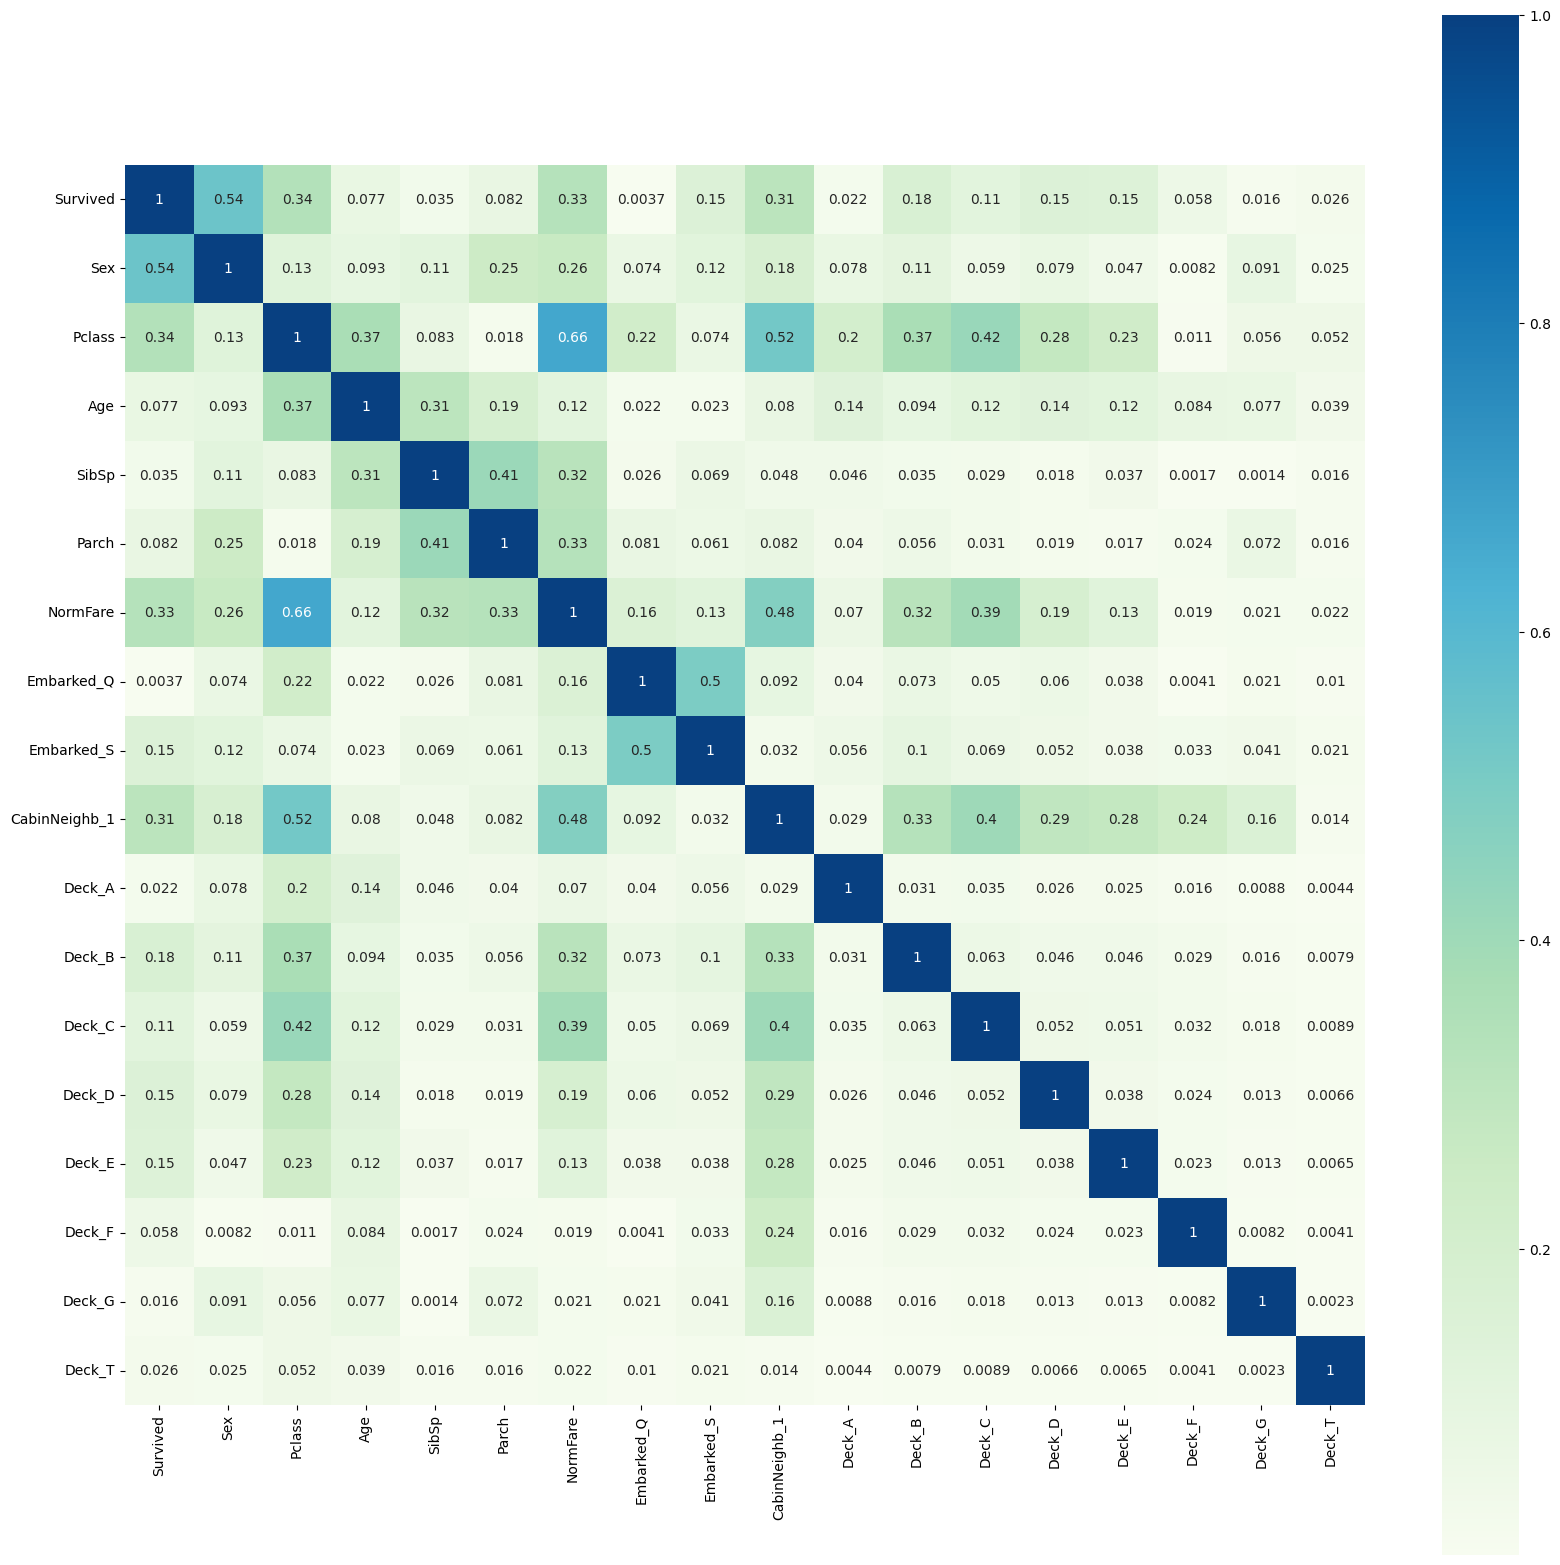

In [38]:
ohe_train_plt = ohe_train_plt.drop(columns=["Embarked_C", "CabinNeighb_0", "Deck_nan"])

corr_mat = ohe_train_plt.corr().abs()
mask = np.array(corr_mat)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20, 20)
sns.heatmap(corr_mat, cmap="GnBu", square=True, annot=True)

Як видно з кореляційної матриці вік залежить від Pclass, SibSp та Parch. AmtSameSurname.

In [39]:
def age_pred_train (row):
    if math.isnan(row["Age"]) :
        ret_val = train[(train["Pclass"] == row[1]) & (train["SibSp"] == row[2]) &
                       (train["Parch"] == row[3])]["Age"].mean()
        if math.isnan(ret_val) :
            ret_val = train["Age"].mean()
        return ret_val

    return row["Age"]

train["Age"] = train[["Age", "Pclass", "SibSp", "Parch"]].apply(age_pred_train, axis=1)
print("(Train) Age missing values: ", train["Age"].isna().sum())

(Train) Age missing values:  0


In [40]:
def age_pred_test (row):
    if math.isnan(row["Age"]) :
        ret_val = test[(test["Pclass"] == row[1]) & (test["SibSp"] == row[2]) &
                       (test["Parch"] == row[3])]["Age"].mean()
        if math.isnan(ret_val) :
            ret_val = test["Age"].mean()
        return ret_val

    return row["Age"]

test["Age"] = test[["Age", "Pclass", "SibSp", "Parch"]].apply(age_pred_train, axis=1)
print("(Test) Age missing values: ", test["Age"].isna().sum())

(Test) Age missing values:  0


# *Irrelevant data removal*

In [41]:
print("Numeric features:\n", numeric_features)
print("\nCategorical features:\n", categorical_features)

Numeric features:
 ['PassengerId', 'Age', 'SibSp', 'Parch', 'Fare', 'NormFare']

Categorical features:
 ['Cabin', 'Ticket', 'Embarked', 'Sex', 'Pclass', 'Name', 'CabinNeighb', 'Deck']


Серед усіх колонок можна прибрати ті, які на мій погляд не мають впливати на визначення щодо виживання, або вже не є актуальними:
1. PassengerId - не є інформативною колонкою;
2. Name - ім'я не впливає на виживання людини;
3. Fare - було створено нову колонку NormFare;
4. Cabin - дана колонка більше не є актуальної, з неї було породжено CabinNeighb та Deck;
5. Ticket - номер квитка не має впливати на виживання людини;
6. Embarked - дана фітча не має впливати на рішення.

In [42]:
actual_num_feat = list(set(numeric_features) - set({"PassengerId", "Fare"}))
actual_cat_feat = list(set(categorical_features) - set({"Name", "Cabin", "Ticket", "Embarked"}))

In [43]:
print("Numeric features:\n", actual_num_feat)
print("\nCategorical features:\n", actual_cat_feat)

Numeric features:
 ['SibSp', 'NormFare', 'Parch', 'Age']

Categorical features:
 ['CabinNeighb', 'Sex', 'Deck', 'Pclass']


# *Data preprocessing*

За допомогою OneHotEncoder розіб'ємо колонки Pclass та Deck, оскільки вони мають більше 2 категорій.

Для колонки Sex застосуємо LabelEncoder, оскільки вона містить строкові значення для категорій.

In [44]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

#preprocessing train dataset
ohe = OneHotEncoder()
prep_train = ohe.fit_transform(train[["Deck"]]).toarray()
prep_train = pd.DataFrame(prep_train, columns=ohe.get_feature_names_out())
prep_train = pd.concat([train[actual_num_feat + list({"Survived", "Sex", "CabinNeighb", "Pclass"})], prep_train], axis=1)

le = LabelEncoder()
prep_train["Sex"] = le.fit_transform(prep_train["Sex"])
print(f"0 is assigned to {le.inverse_transform([0])}\n1 is assigned to {le.inverse_transform([1])}")

0 is assigned to ['female']
1 is assigned to ['male']


In [45]:
#preprocessing test dataset
prep_test = ohe.fit_transform(test[["Deck"]]).toarray()
prep_test = pd.DataFrame(prep_test, columns=ohe.get_feature_names_out())
prep_test = pd.concat([test[actual_num_feat + list({"Sex", "CabinNeighb", "Pclass"})], prep_test], axis=1)

prep_test["Sex"] = le.fit_transform(prep_test["Sex"])
print(f"0 is assigned to {le.inverse_transform([0])}\n1 is assigned to {le.inverse_transform([1])}")

0 is assigned to ['female']
1 is assigned to ['male']


Серед нових сформованих колонок можна видалити Pclass_3 та Deck_nan тому, що вони визначаються за допомогю значень з інших колонок (Pclass_1 == 0 & Pclass_2 == 0 => Pclass_3 = 1).

In [46]:
actual_cat_feat = list(set(actual_cat_feat) - set(["Deck"]))
actual_cat_feat = actual_cat_feat + list(ohe.get_feature_names_out(["Deck"]))
actual_cat_feat = list(set(actual_cat_feat) - set(["Deck_nan"]))
actual_cat_feat.sort()
actual_cat_feat

['CabinNeighb',
 'Deck_A',
 'Deck_B',
 'Deck_C',
 'Deck_D',
 'Deck_E',
 'Deck_F',
 'Deck_G',
 'Pclass',
 'Sex']

In [47]:
prep_train[list(["Survived"]) + actual_num_feat + actual_cat_feat]

Survived  SibSp  NormFare  Parch   Age CabinNeighb  Deck_A  Deck_B   
0          0      1  2.110213      0  22.0           0     0.0     0.0  \
1          1      1  4.280593      0  38.0           1     0.0     0.0   
2          1      0  2.188856      0  26.0           0     0.0     0.0   
3          1      1  3.990834      0  35.0           1     0.0     0.0   
4          0      0  2.202765      0  35.0           0     0.0     0.0   
..       ...    ...       ...    ...   ...         ...     ...     ...   
886        0      0  2.639057      0  27.0           0     0.0     0.0   
887        1      0  3.433987      0  19.0           0     0.0     1.0   
888        0      1  3.196630      2  13.5           0     0.0     0.0   
889        1      0  3.433987      0  26.0           0     0.0     0.0   
890        0      0  2.169054      0  32.0           0     0.0     0.0   

     Deck_C  Deck_D  Deck_E  Deck_F  Deck_G Pclass  Sex  
0       0.0     0.0     0.0     0.0     0.0      3    1  
1       1.0     0.0     0.0     0.0     0.0      1    0  
2       0.0     0.0     0.0     0.0     0.0      3    0  
3       1.0     0.0     0.0     0.0     0.0      1    0  
4       0.0     0.0     0.0     0.0     0.0      3    1  
..      ...     ...     ...     ...     ...    ...  ...  
886     0.0     0.0     0.0     0.0     0.0      2    1  
887     0.0     0.0     0.0     0.0     0.0      1    0  
888     0.0     0.0     0.0     0.0     0.0      3    0  
889     1.0     0.0     0.0     0.0     0.0      1    1  
890     0.0     0.0     0.0     0.0     0.0      3    1  

[891 rows x 15 columns]

In [48]:
prep_test[actual_num_feat + actual_cat_feat]

SibSp  NormFare  Parch        Age CabinNeighb  Deck_A  Deck_B  Deck_C   
0        0  2.178064      0  34.500000           0     0.0     0.0     0.0  \
1        1  2.079442      0  47.000000           0     0.0     0.0     0.0   
2        0  2.369075      0  62.000000           0     0.0     0.0     0.0   
3        0  2.268252      0  27.000000           0     0.0     0.0     0.0   
4        1  2.586824      1  22.000000           0     0.0     0.0     0.0   
..     ...       ...    ...        ...         ...     ...     ...     ...   
413      0  2.202765      0  28.235556           0     0.0     0.0     0.0   
414      0  4.699571      0  39.000000           0     0.0     0.0     1.0   
415      0  2.110213      0  38.500000           0     0.0     0.0     0.0   
416      0  2.202765      0  28.235556           0     0.0     0.0     0.0   
417      1  3.150952      1  21.000000           0     0.0     0.0     0.0   

     Deck_D  Deck_E  Deck_F  Deck_G Pclass  Sex  
0       0.0     0.0     0.0     0.0      3    1  
1       0.0     0.0     0.0     0.0      3    0  
2       0.0     0.0     0.0     0.0      2    1  
3       0.0     0.0     0.0     0.0      3    1  
4       0.0     0.0     0.0     0.0      3    0  
..      ...     ...     ...     ...    ...  ...  
413     0.0     0.0     0.0     0.0      3    1  
414     0.0     0.0     0.0     0.0      1    0  
415     0.0     0.0     0.0     0.0      3    1  
416     0.0     0.0     0.0     0.0      3    1  
417     0.0     0.0     0.0     0.0      3    1  

[418 rows x 14 columns]

# *Classification*

In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix

train_x = prep_train[actual_num_feat + actual_cat_feat]
train_y = prep_train["Survived"]

sc = StandardScaler()
train_x = sc.fit_transform(train_x)

train_split_x, validate_x, train_split_y, validate_y = train_test_split(train_x, train_y, test_size=0.2)

rfc = RandomForestClassifier(max_depth=5)
rfc.fit(train_split_x, train_split_y)

train_pred = rfc.predict(train_split_x)
valid_pred = rfc.predict(validate_x)

train_pred_prob = rfc.predict_proba(train_split_x)
valid_pred_prob = rfc.predict_proba(validate_x)

print("Train set")
print("Accuracy score: ", accuracy_score(train_split_y, train_pred))
print("ROC AUC: ", roc_auc_score(train_split_y, train_pred))
print("ROC AUC probability: ", roc_auc_score(train_split_y, train_pred_prob[:, 1]))
print("Confusion matrix:")
print("    P      N\n", confusion_matrix(train_split_y, train_pred))

print("\nValidation set")
print("Accuracy score: ", accuracy_score(validate_y, valid_pred))
print("ROC AUC:        ", roc_auc_score(validate_y, valid_pred))
print("ROC AUC proba:  ", roc_auc_score(validate_y, valid_pred_prob[:, 1]))
print("Confusion matrix:")
print("    P      N\n", confusion_matrix(validate_y, valid_pred))

Train set
Accuracy score:  0.8693820224719101
ROC AUC:  0.8423927842069435
ROC AUC probability:  0.9025272294077604
Confusion matrix:
    P      N
 [[426  26]
 [ 67 193]]

Validation set
Accuracy score:  0.8100558659217877
ROC AUC:         0.8030550666331405
ROC AUC proba:   0.8782373648478753
Confusion matrix:
    P      N
 [[86 11]
 [23 59]]


# *Regression*

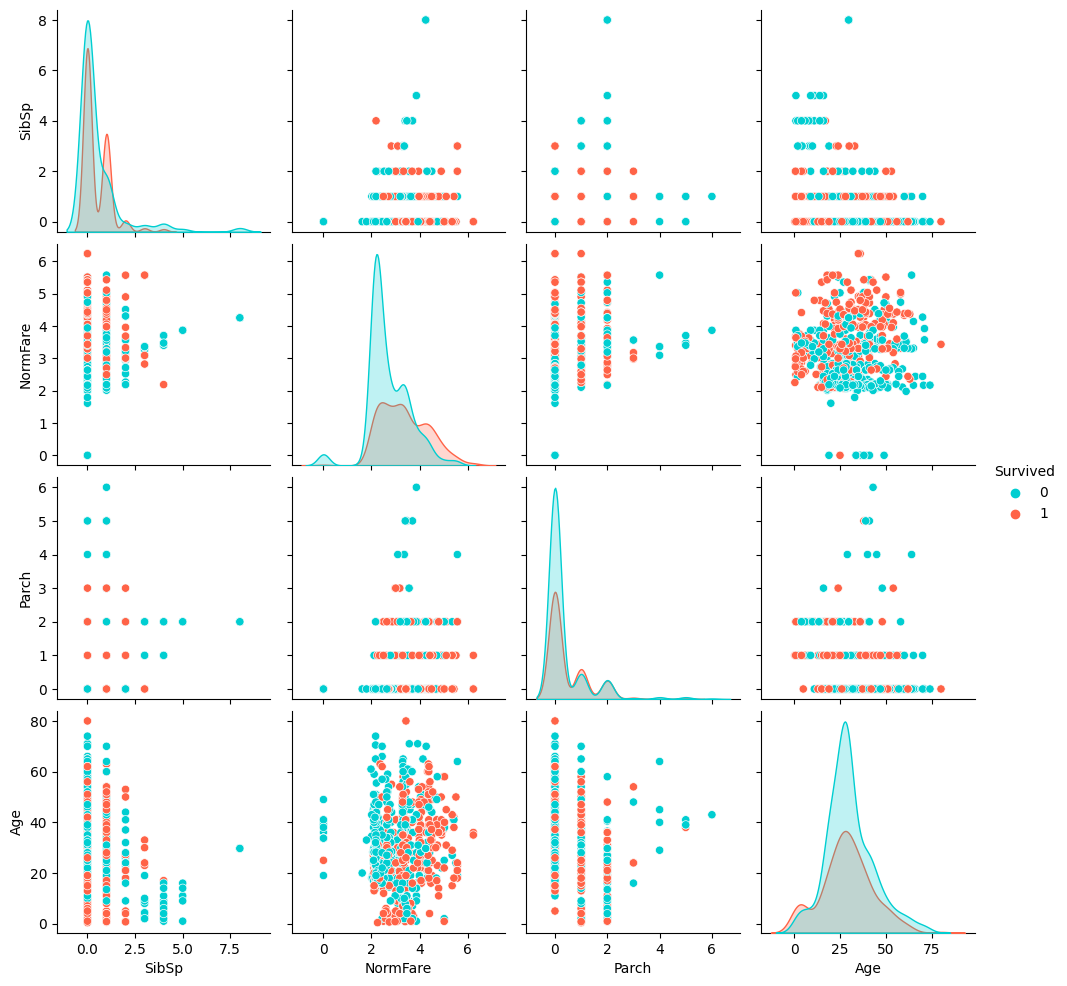

In [50]:
sns.pairplot(prep_train[list({"Survived"}) + actual_num_feat], hue="Survived")

In [127]:
reg_features = list(["Sex", "Age", "Parch", "NormFare"])

train_x = prep_train[reg_features]
train_y = prep_train["Survived"]

sc = StandardScaler()
train_x = sc.fit_transform(train_x)

## *KMeans*

In [128]:
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix
from sklearn.cluster import KMeans

def kmeans_clustering(n_clusters, max_iter, algorithm, tol):
    km = KMeans(n_clusters=n_clusters, max_iter=max_iter, n_init="auto", algorithm=algorithm, tol=tol)
    km.fit(train_x)
    train_pred = km.fit_predict(train_x)

    print(f"Algorithm = '{algorithm}'")
    print(f"Tolerance = {tol}")
    print("MSE: ", mean_squared_error(train_y, train_pred))
    print("Accuracy score: ", accuracy_score(train_y, train_pred))
    print("Confusion matrix:\n", confusion_matrix(train_y, train_pred))
    print("\n")
        
    plot_feat_x = set(reg_features)
    
    for x_feat in plot_feat_x:      
        fig, axes = plt.subplots(nrows=1, ncols=len(plot_feat_x), figsize=(15, 3), layout="constrained")
        kmeans = pd.DataFrame(train_pred)
        
        for i, ax in enumerate(axes.flat):
            scatter = ax.scatter(x=prep_train[x_feat], y=prep_train[list(plot_feat_x)[i]], c=kmeans[0], cmap="winter")
            ax.set_xlabel(x_feat)
            ax.set_ylabel(list(plot_feat_x)[i])
            plt.colorbar(scatter)

### *Algorithm: lloyd*

Algorithm = 'lloyd'
Tolerance = 0.01
MSE:  0.7003367003367004
Accuracy score:  0.2996632996632997
Confusion matrix:
 [[ 82 467]
 [157 185]]




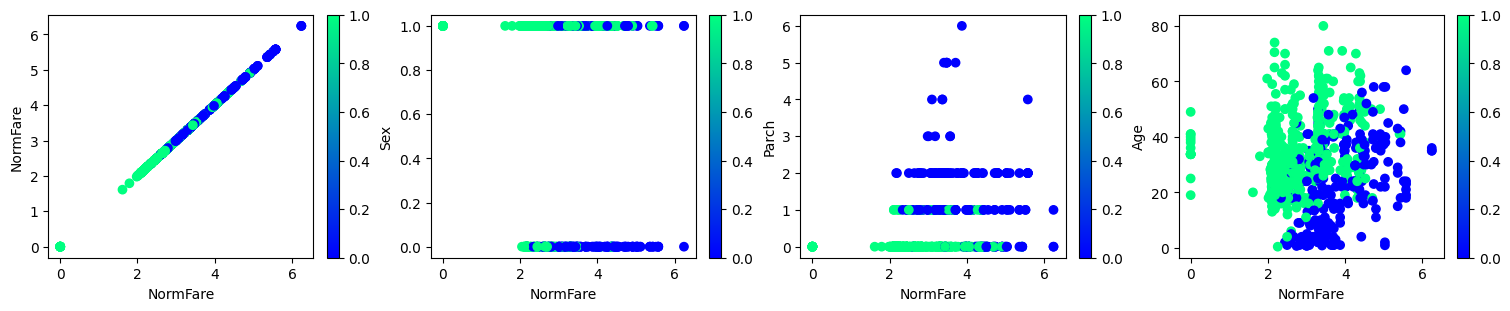

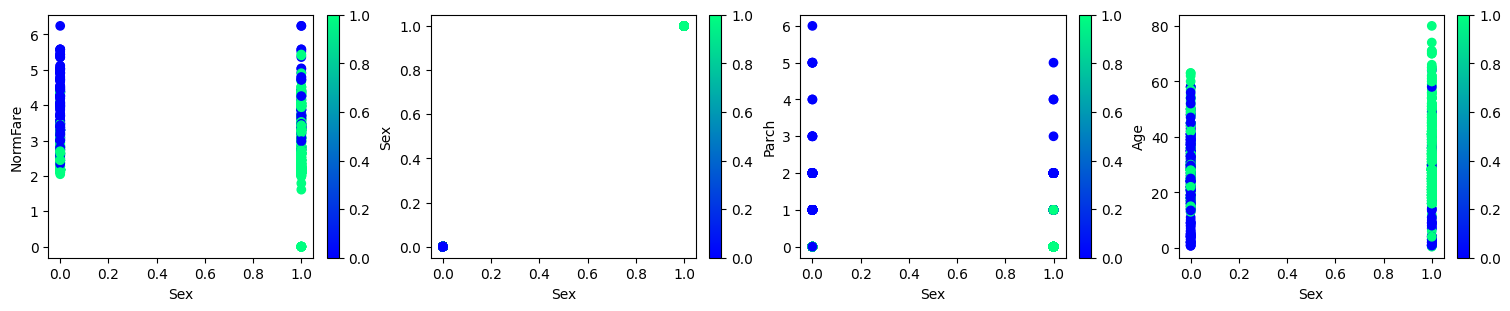

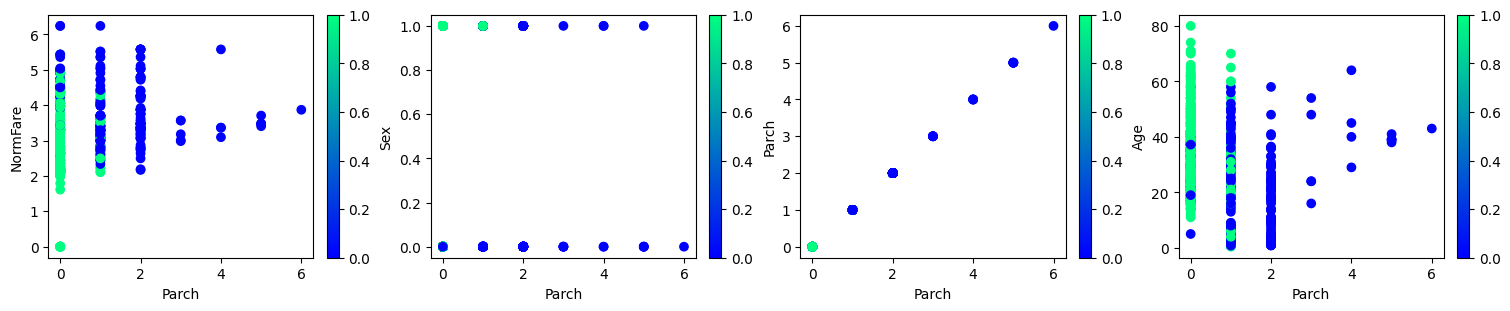

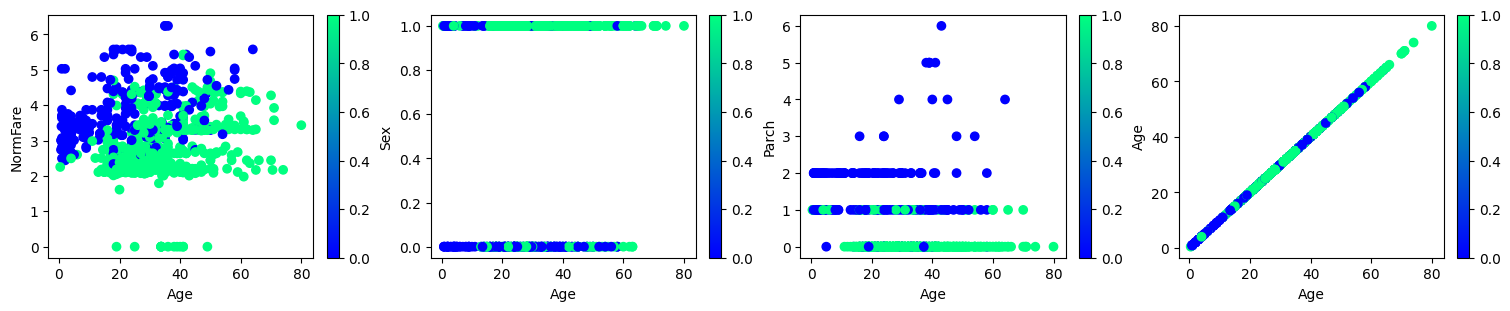

In [129]:
kmeans_clustering(n_clusters=2, max_iter=200, algorithm="lloyd", tol=1e-2)

Algorithm = 'lloyd'
Tolerance = 0.001
MSE:  0.29292929292929293
Accuracy score:  0.7070707070707071
Confusion matrix:
 [[455  94]
 [167 175]]




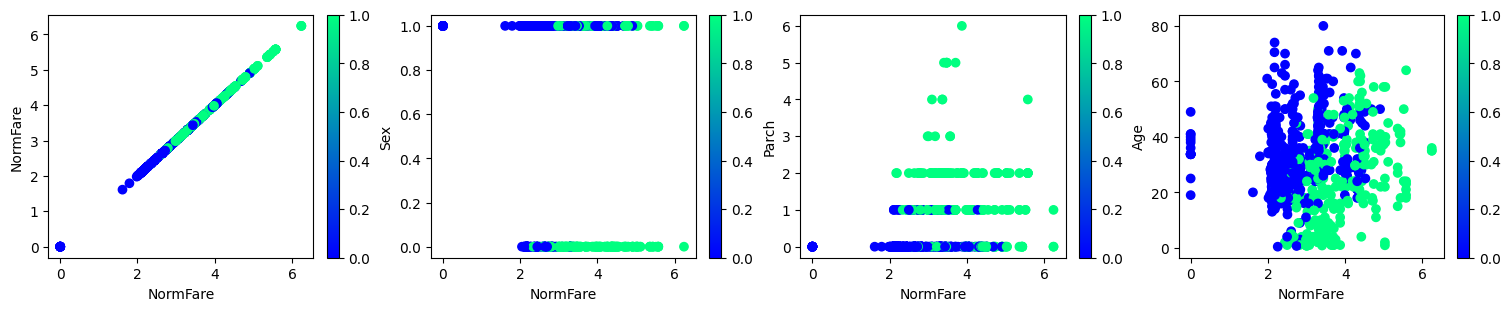

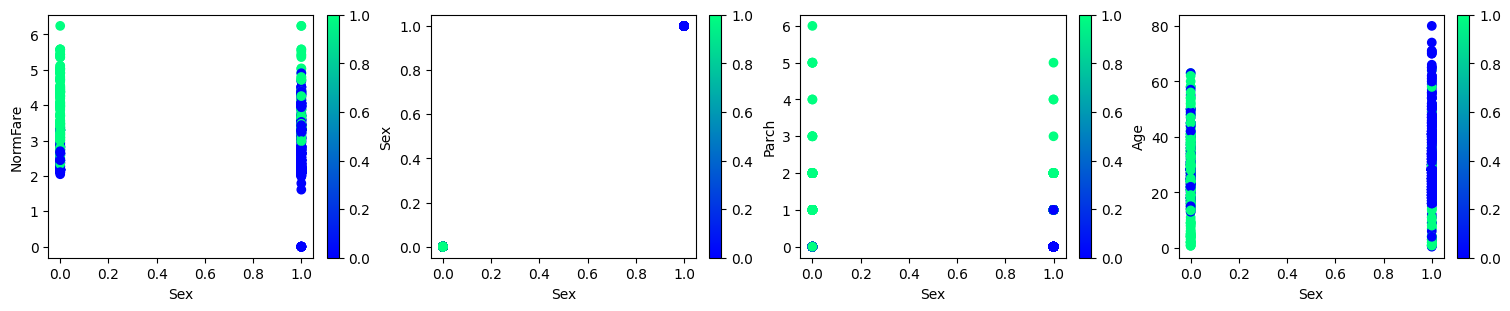

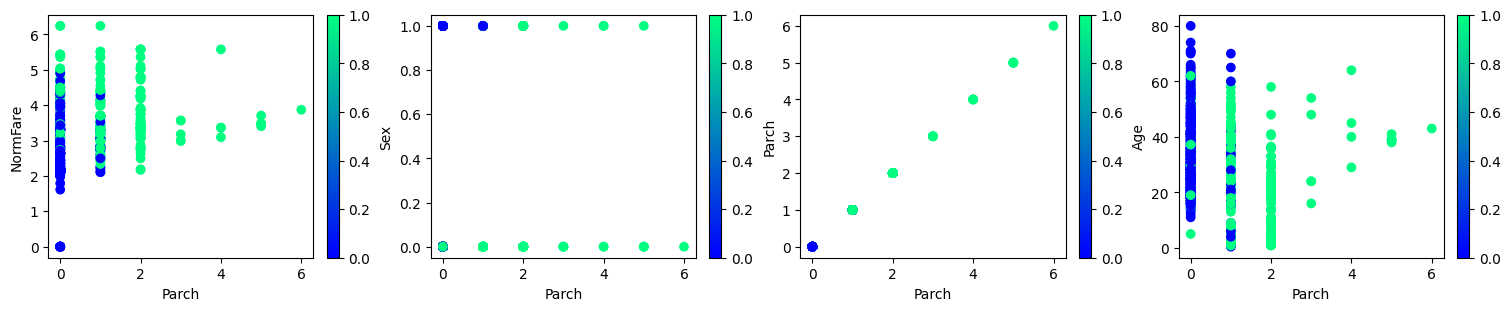

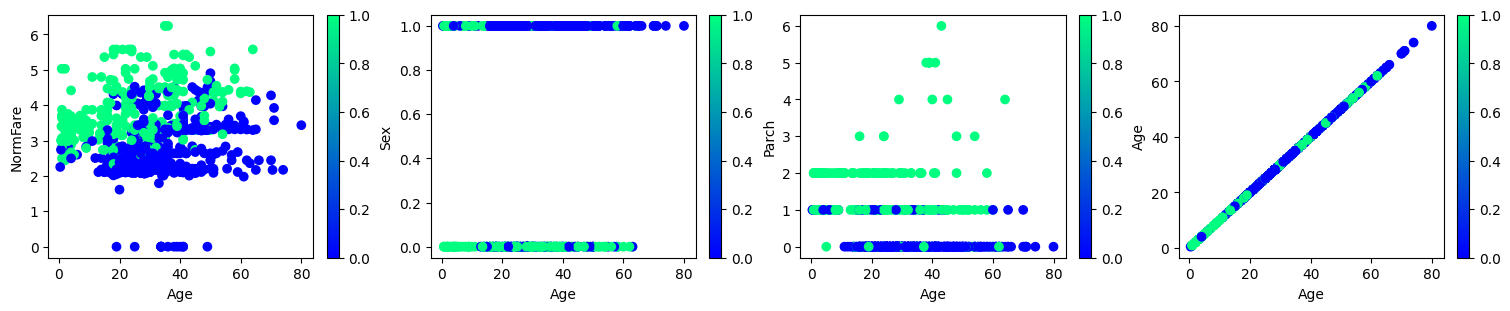

In [130]:
kmeans_clustering(n_clusters=2, max_iter=200, algorithm="lloyd", tol=1e-3)

Algorithm = 'lloyd'
Tolerance = 0.0001
MSE:  0.22783389450056116
Accuracy score:  0.7721661054994389
Confusion matrix:
 [[442 107]
 [ 96 246]]




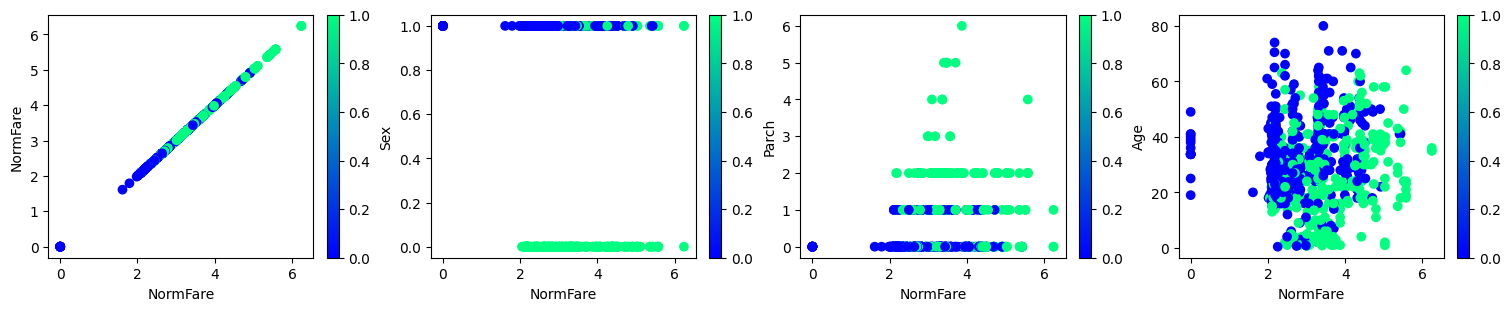

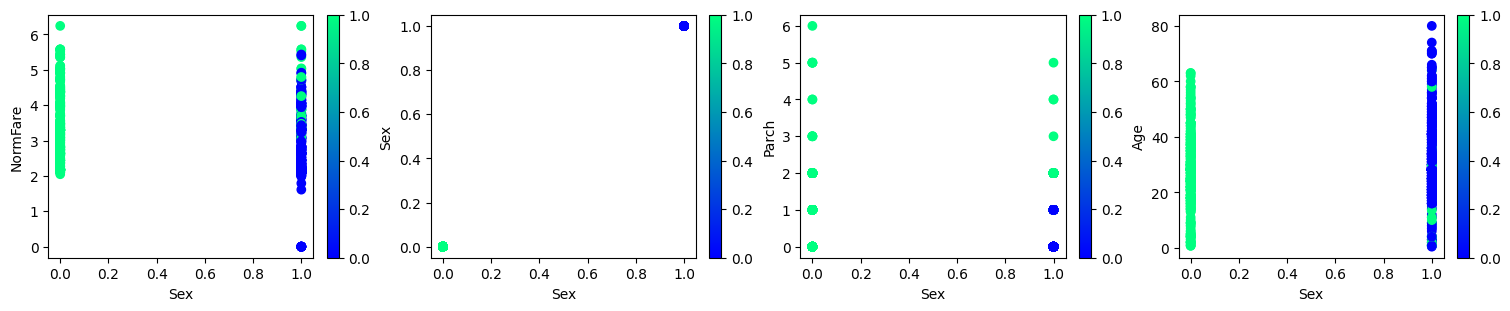

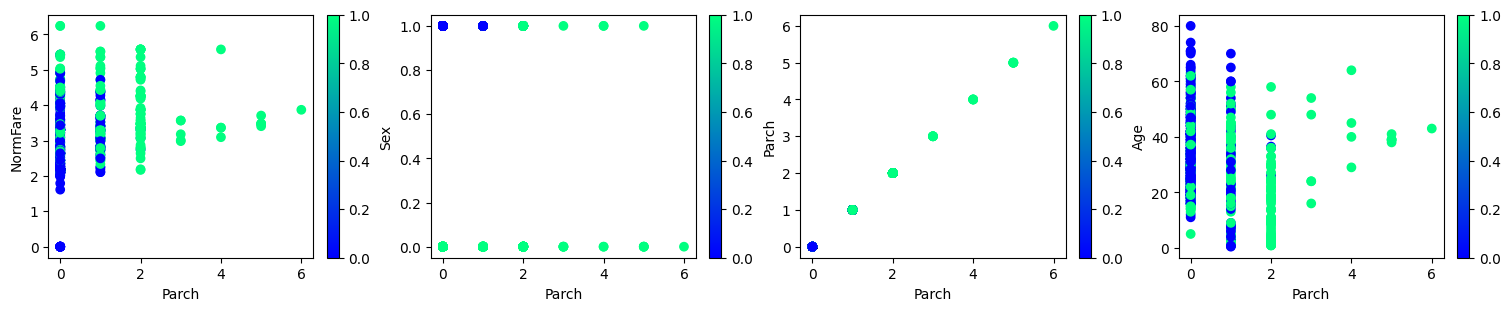

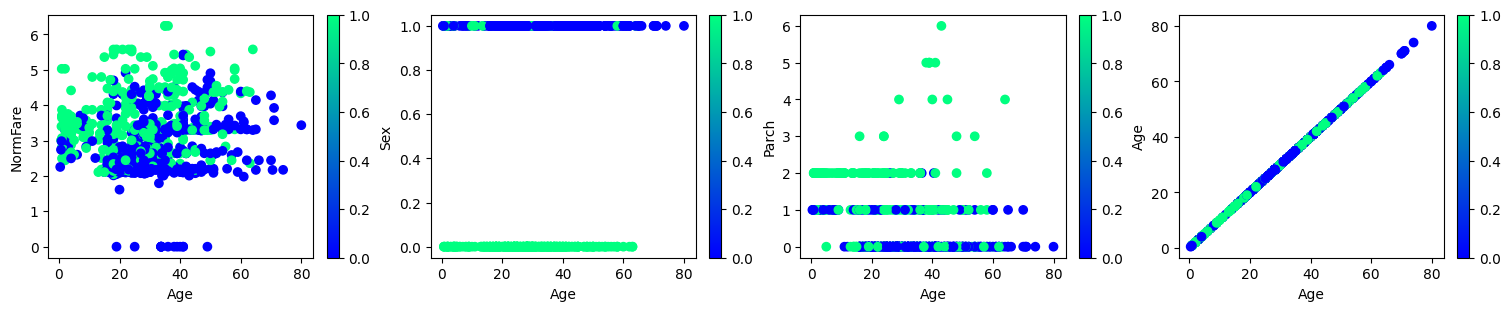

In [131]:
kmeans_clustering(n_clusters=2, max_iter=200, algorithm="lloyd", tol=1e-4)

### *Algorithm: elkan*

Algorithm = 'elkan'
Tolerance = 0.01
MSE:  0.27946127946127947
Accuracy score:  0.7205387205387206
Confusion matrix:
 [[449 100]
 [149 193]]




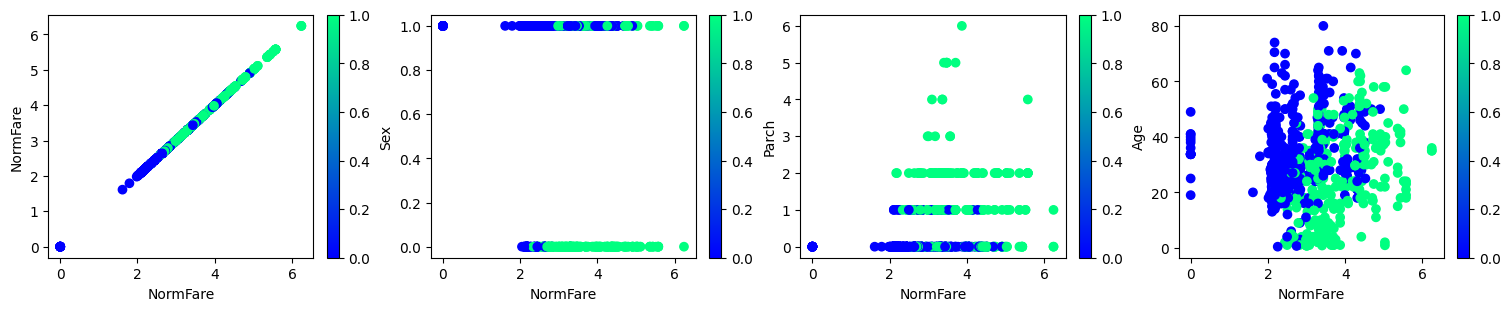

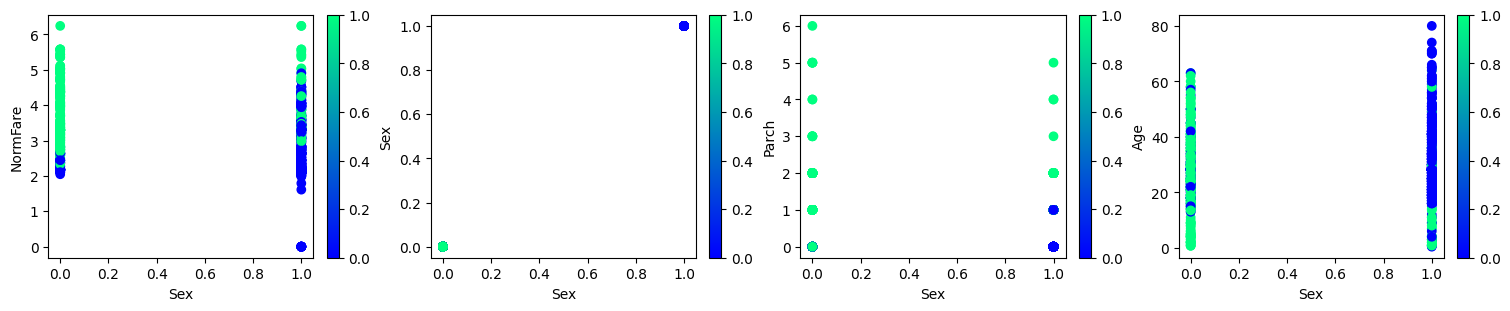

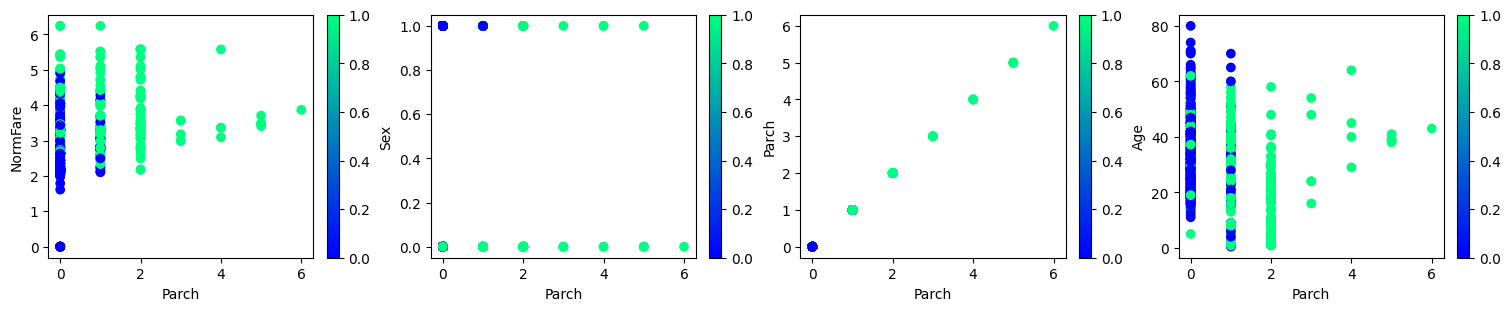

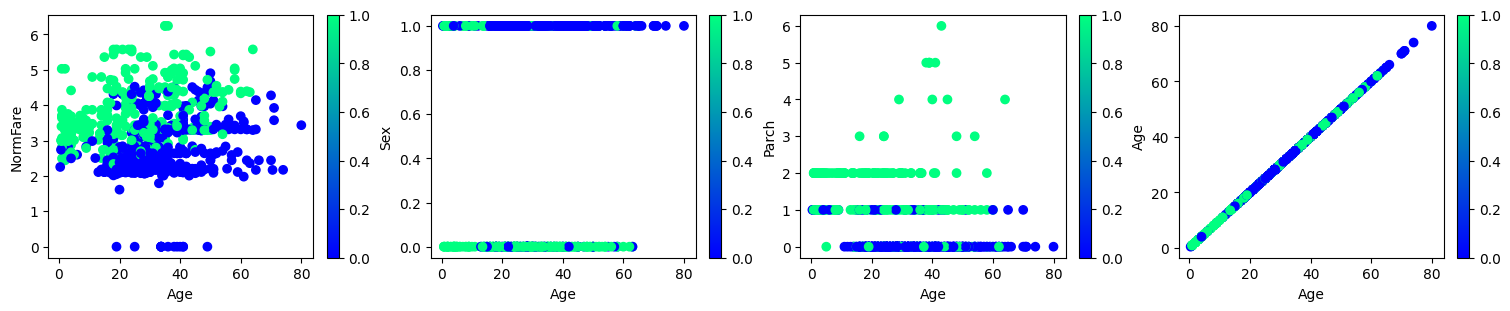

In [132]:
kmeans_clustering(n_clusters=2, max_iter=200, algorithm="elkan", tol=1e-2)

Algorithm = 'elkan'
Tolerance = 0.001
MSE:  0.7070707070707071
Accuracy score:  0.29292929292929293
Confusion matrix:
 [[ 94 455]
 [175 167]]




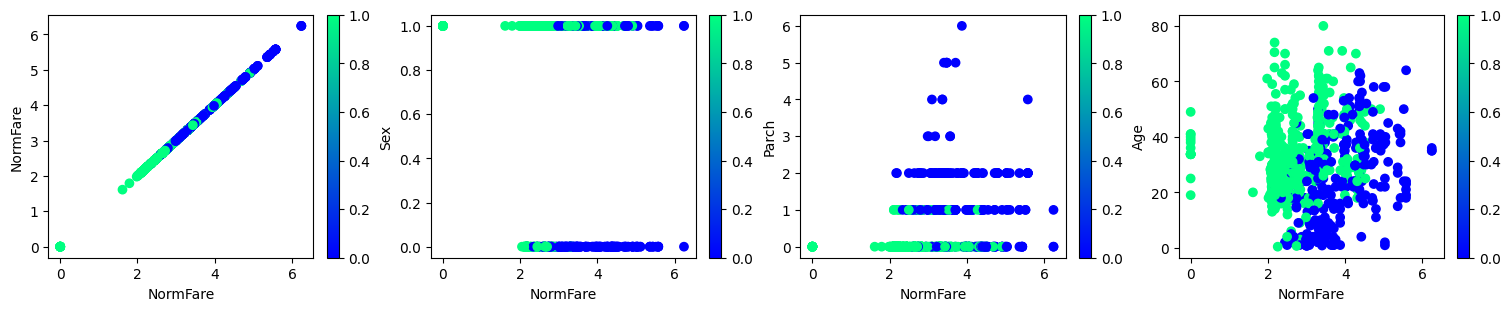

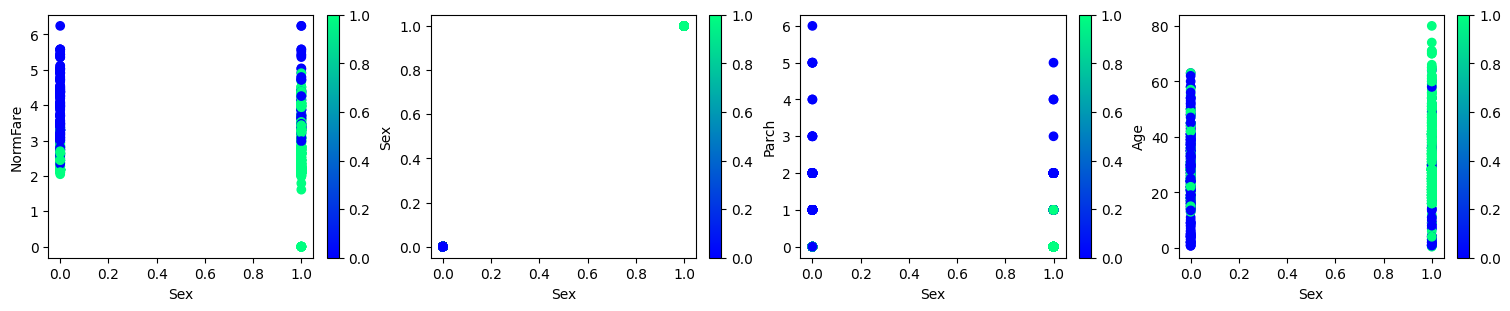

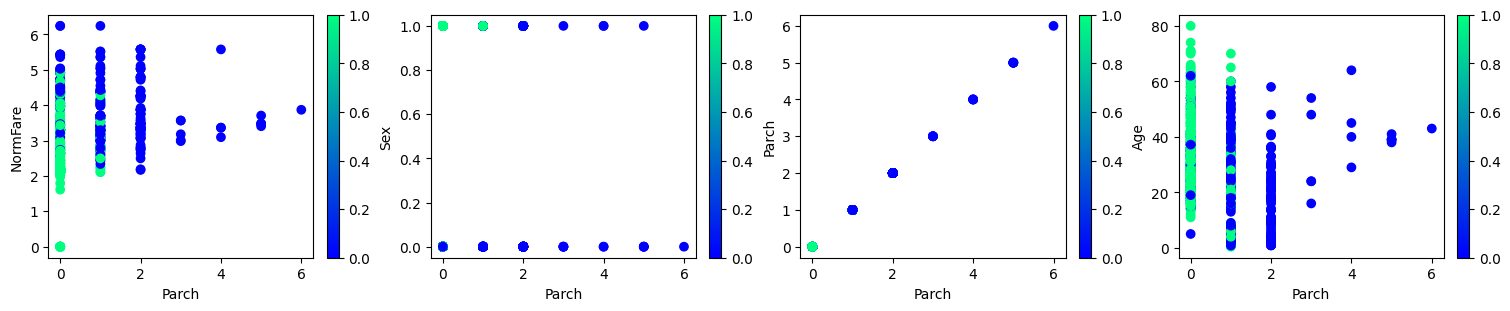

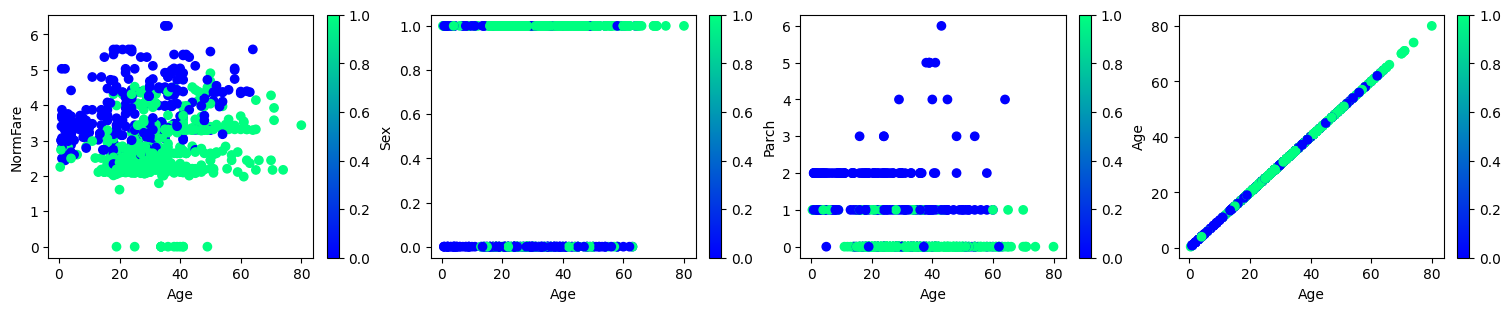

In [133]:
kmeans_clustering(n_clusters=2, max_iter=200, algorithm="elkan", tol=1e-3)

Algorithm = 'elkan'
Tolerance = 0.0001
MSE:  0.22783389450056116
Accuracy score:  0.7721661054994389
Confusion matrix:
 [[443 106]
 [ 97 245]]




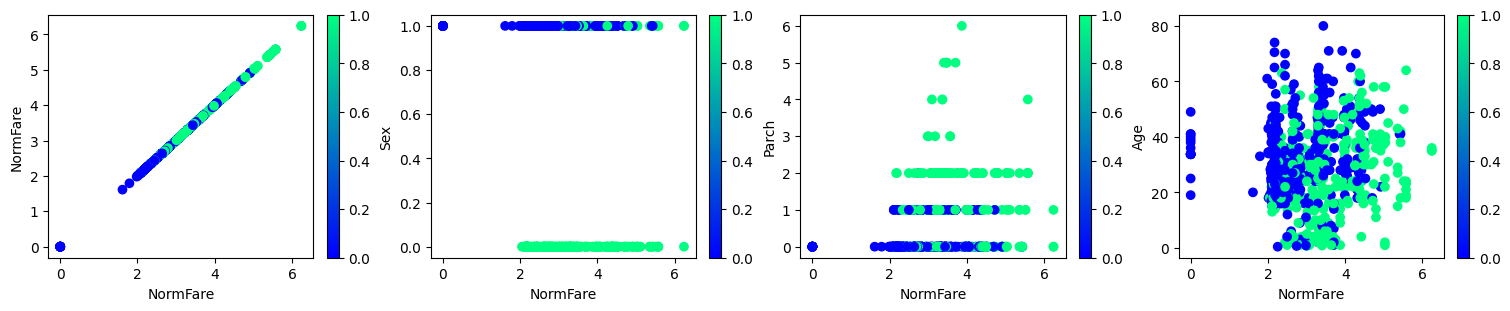

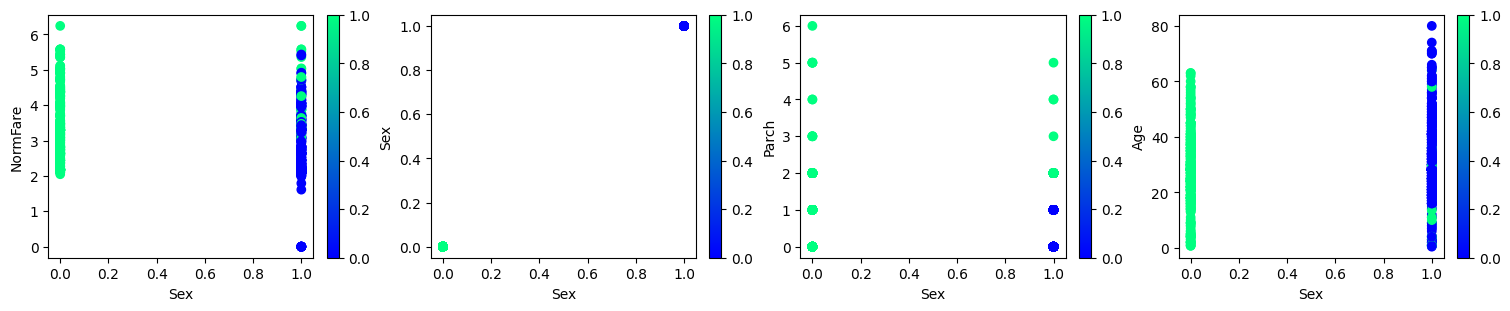

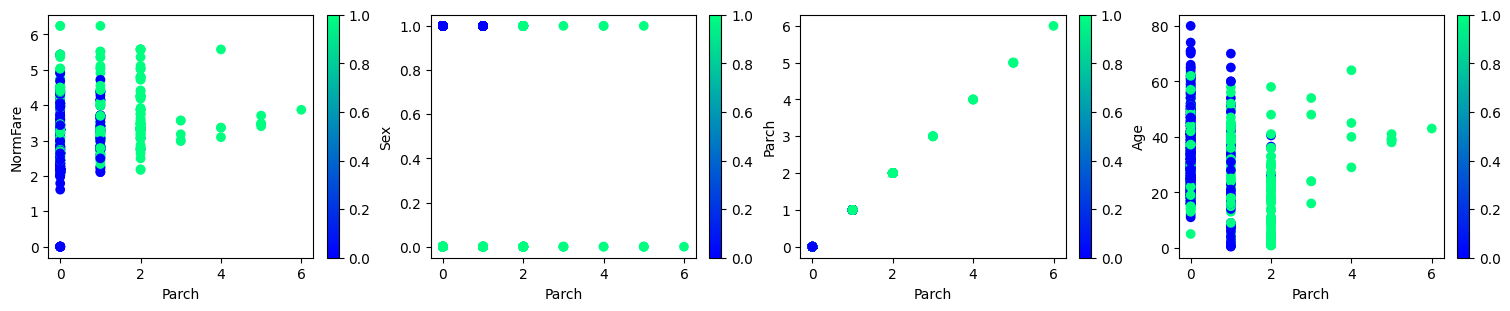

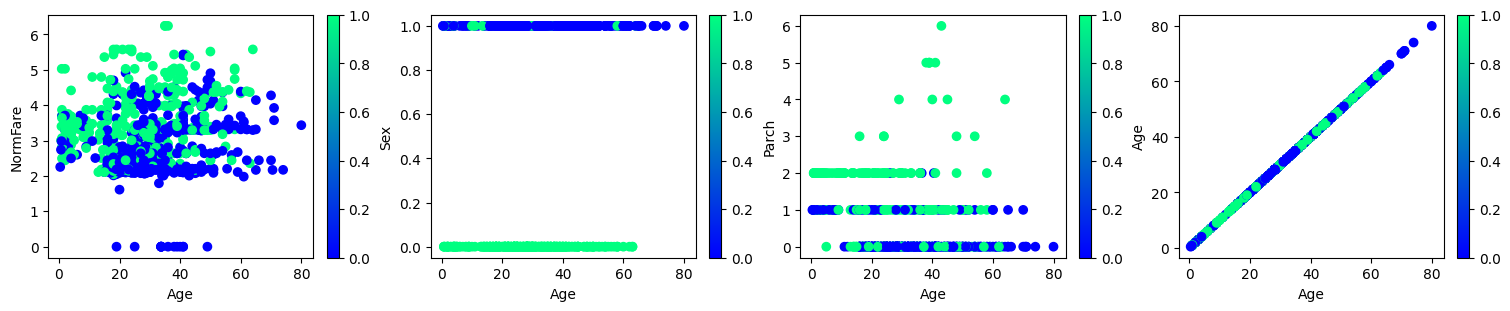

In [134]:
kmeans_clustering(n_clusters=2, max_iter=200, algorithm="elkan", tol=1e-4)

Для методу $KMeans$ змінювалися гіперпараметри $algorithm$ та $tol$. Загалом алгоритм $elkan$ є більш ефективним ніж $lloyd$, тому з однаковими значеннями $tolerance$ (значення різниці між ітераціями, при якій рішення можна вважати що рішення зійшлося) алгоритм $elkan$ показав кращі результати.

## *Agglomerative Clustering*

In [135]:
from sklearn.cluster import AgglomerativeClustering

def agglomerative_clustering(n_clusters, linkage):
    aggl_clst = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
    aggl_clst.fit(train_x)
    train_pred = aggl_clst.fit_predict(train_x)

    print(f"Linkage = '{linkage}'")
    print("MSE: ", mean_squared_error(train_y, train_pred))
    print("Accuracy score: ", accuracy_score(train_y, train_pred))
    print("Confusion matrix:\n", confusion_matrix(train_y, train_pred))
    print("\n")
    
    plot_feat_x = set(reg_features)

    for x_feat in plot_feat_x:
        fig, axes = plt.subplots(nrows=1, ncols=len(plot_feat_x), figsize=(15, 3), layout="constrained")
        agglomerative = pd.DataFrame(train_pred)
        
        for i, ax in enumerate(axes.flat):
            scatter = ax.scatter(x=prep_train[x_feat], y=prep_train[list(plot_feat_x)[i]], c=agglomerative[0], cmap="cool")
            ax.set_xlabel(x_feat)
            ax.set_ylabel(list(plot_feat_x)[i])
            plt.colorbar(scatter)

### *Linkage: single*

Linkage = 'single'
MSE:  0.38496071829405165
Accuracy score:  0.6150392817059483
Confusion matrix:
 [[548   1]
 [342   0]]




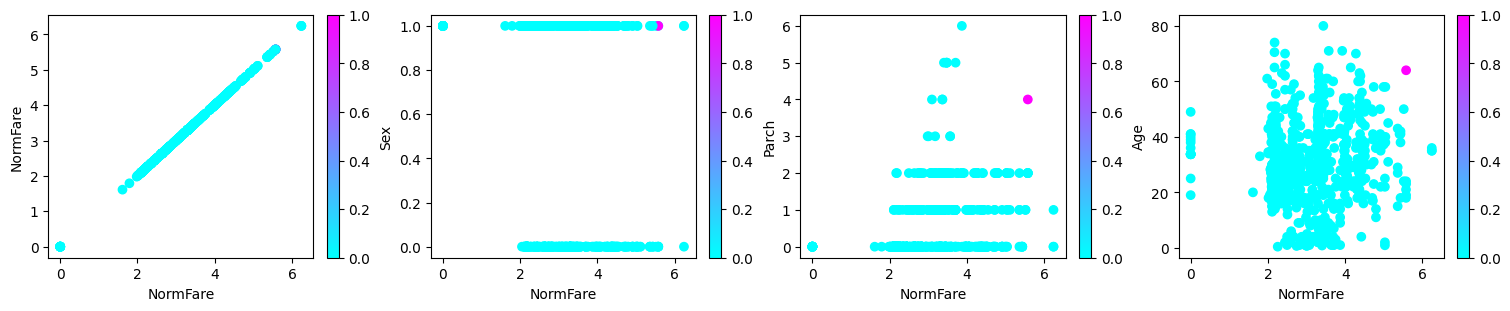

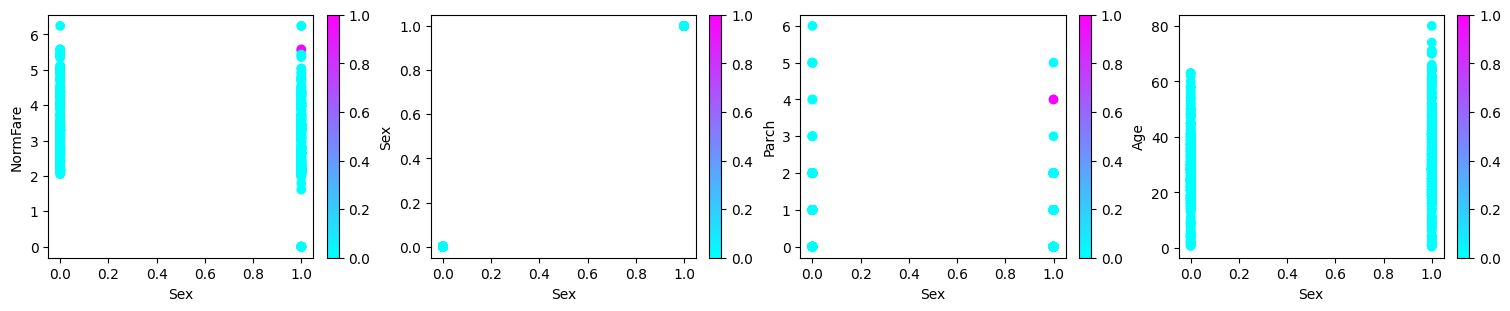

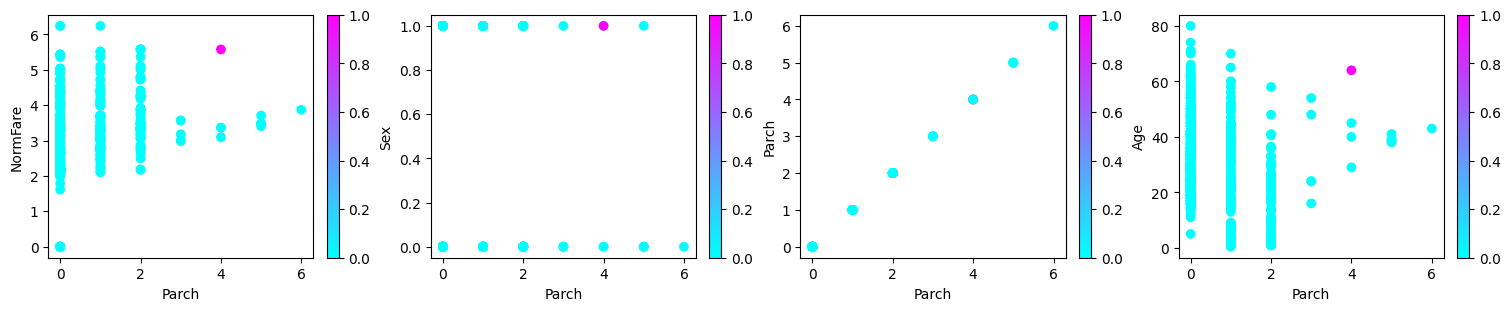

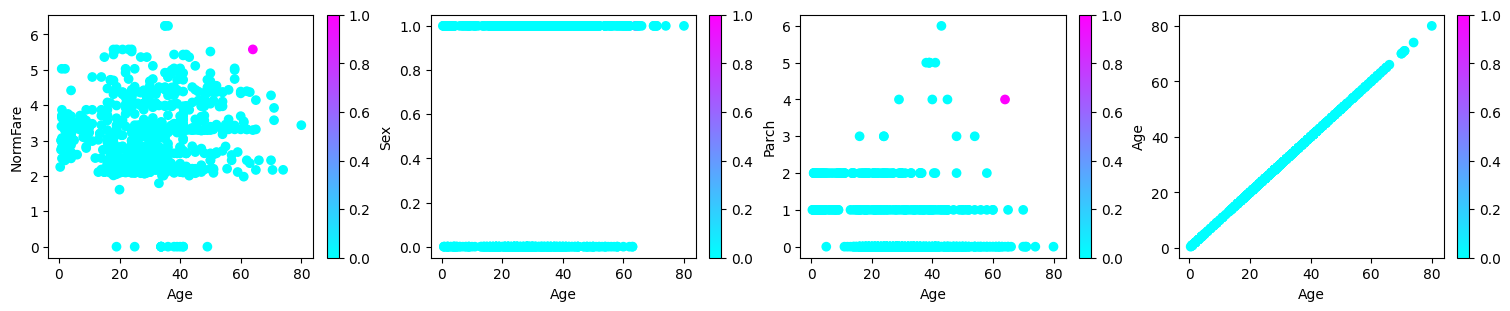

In [136]:
agglomerative_clustering(n_clusters=2, linkage="single")

### *Linkage: average*

Linkage = 'average'
MSE:  0.39281705948372614
Accuracy score:  0.6071829405162739
Confusion matrix:
 [[539  10]
 [340   2]]




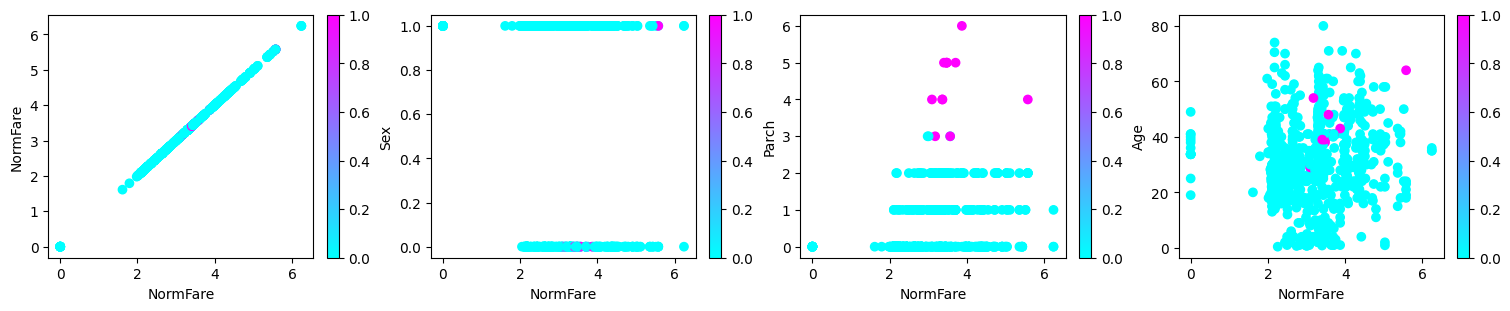

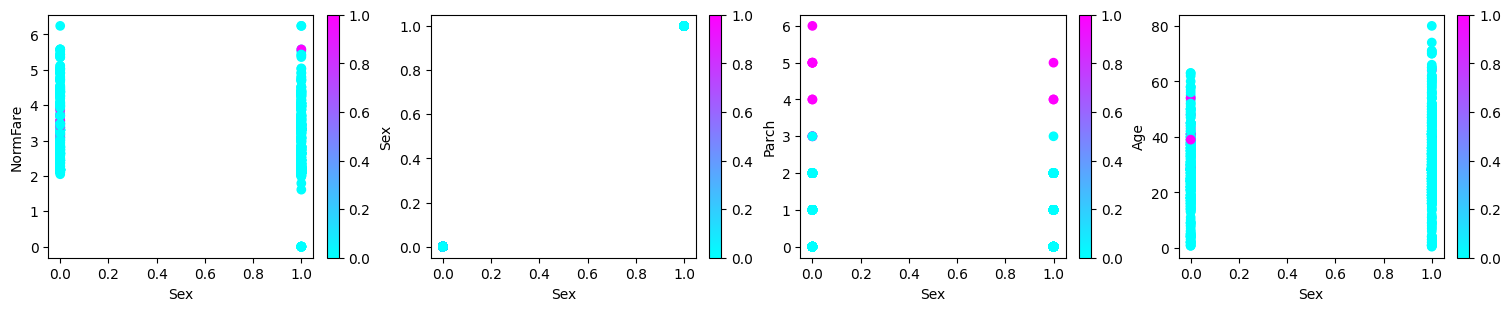

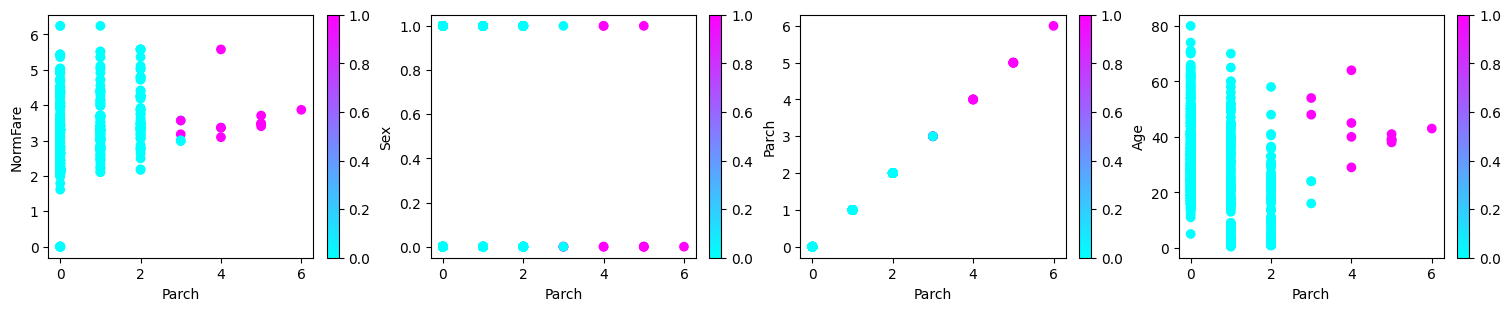

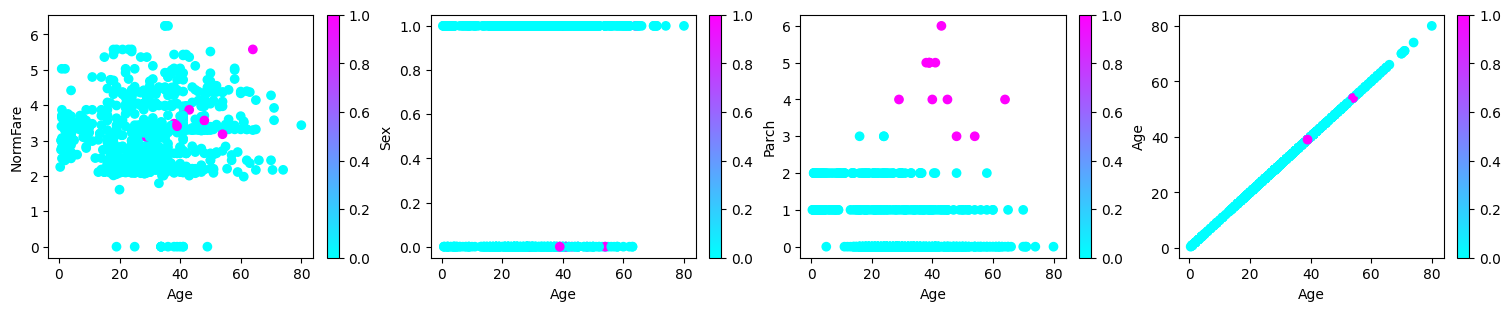

In [137]:
agglomerative_clustering(n_clusters=2, linkage="average")

### *Linkage: complete*

Linkage = 'complete'
MSE:  0.39057239057239057
Accuracy score:  0.6094276094276094
Confusion matrix:
 [[542   7]
 [341   1]]




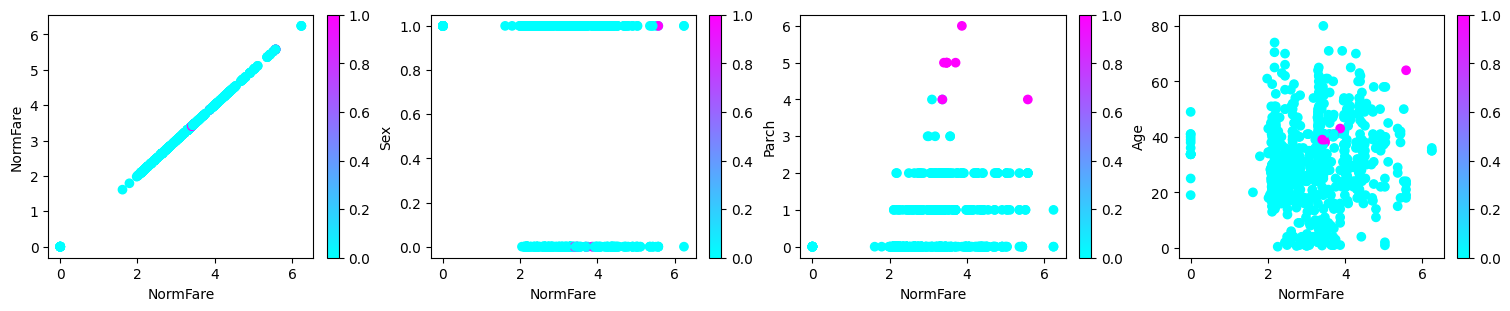

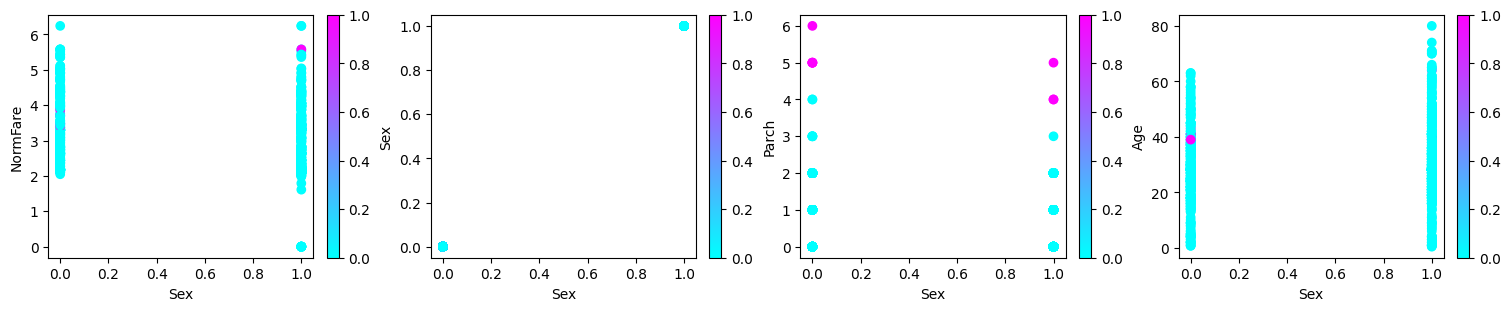

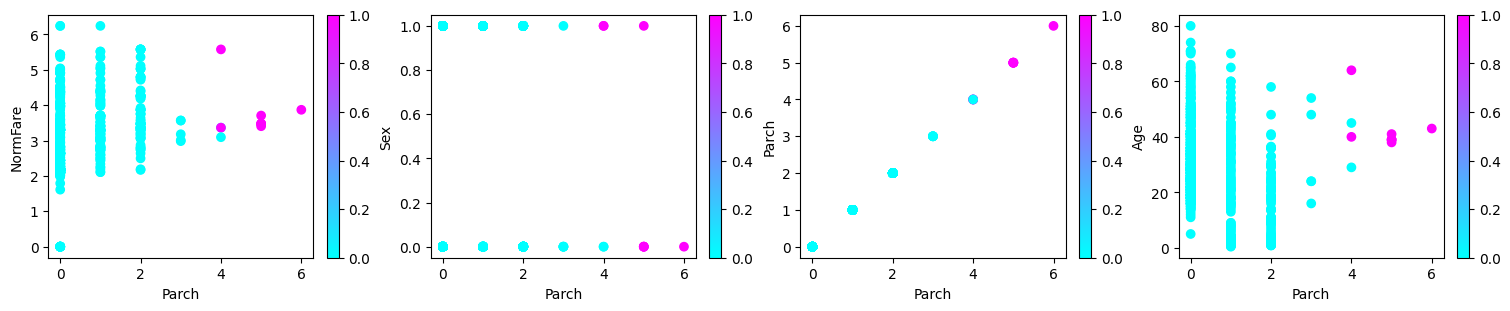

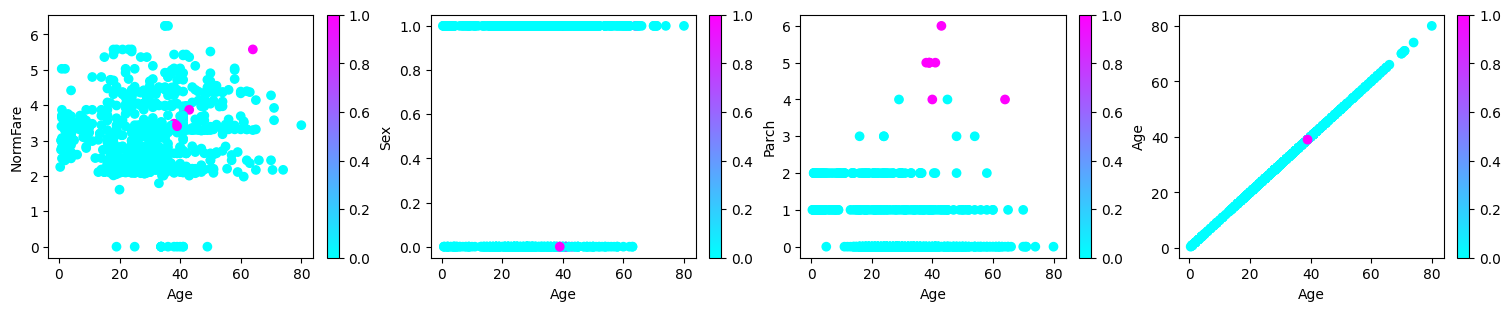

In [138]:
agglomerative_clustering(n_clusters=2, linkage="complete")

### *Linkage: ward*

Linkage = 'ward'
MSE:  0.7474747474747475
Accuracy score:  0.25252525252525254
Confusion matrix:
 [[155 394]
 [272  70]]




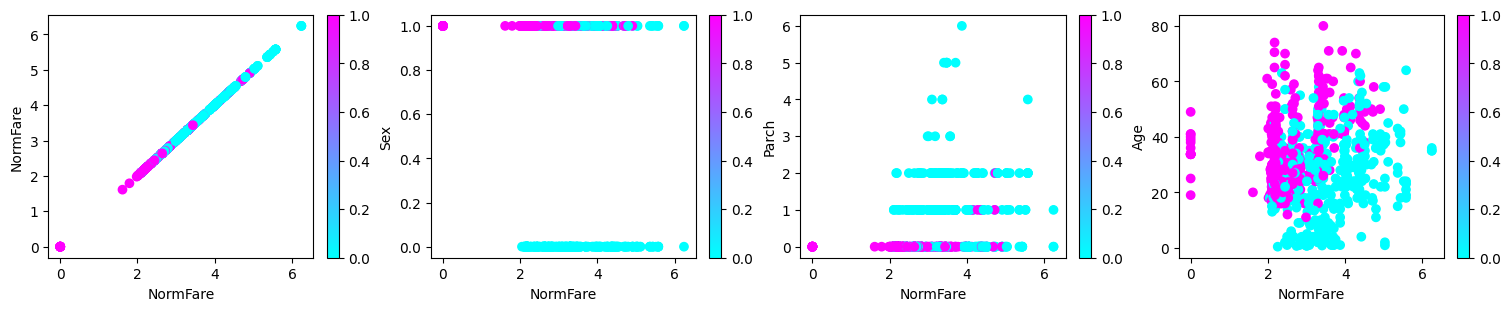

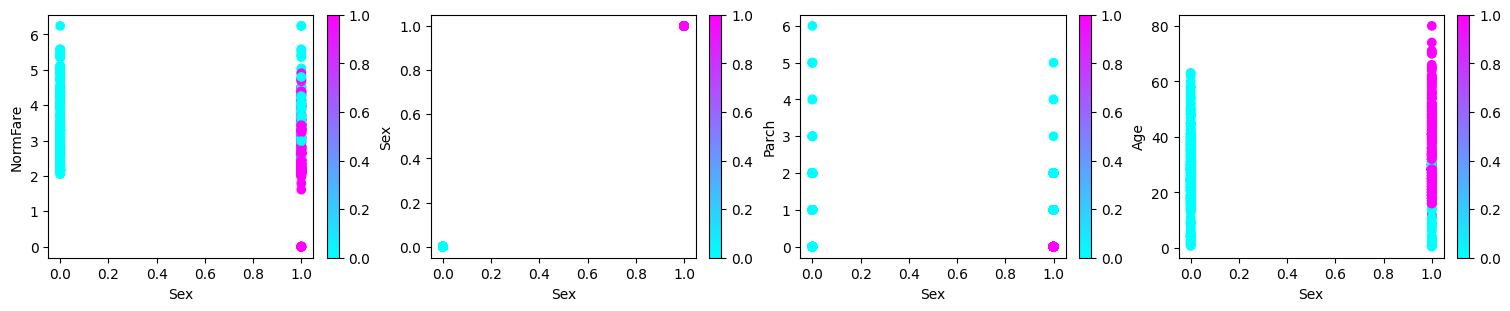

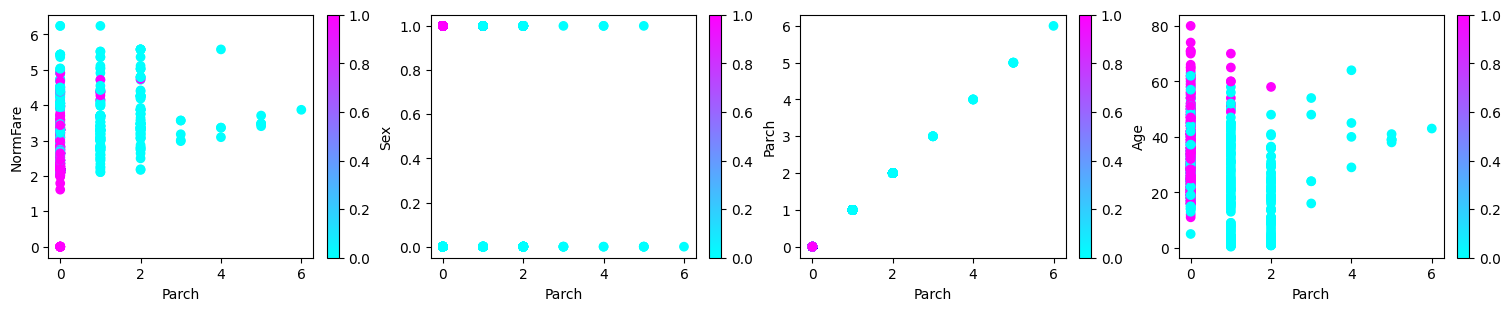

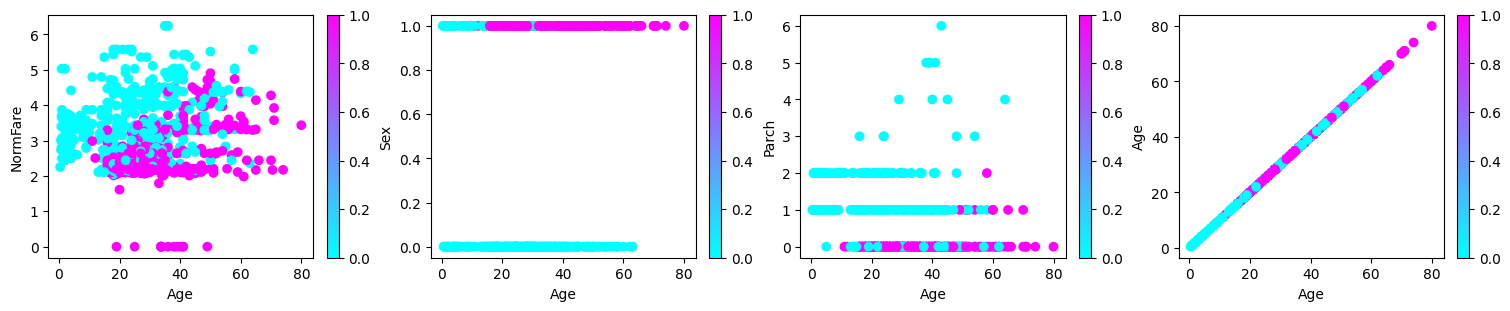

In [139]:
agglomerative_clustering(n_clusters=2, linkage="ward")

Агломеративний метод кластеризації для своєї побудови використовує різні методи порівняння кластерів. Провевши тестування на різних таких методах отримано наступні результати:
- $single$ - через те що порівняння кластерів відбувається за найменшою відстанню, результат буде сильно залежити від наявності рідкісних, унікальних значень або аутлаєрів. У даному випадку в один кластер потрапили майже всі значення, а у інший ті, які є рідкісними;
- $average$ - порівняння відбувається між середнім значенням відстаней між кожною точкою кластерів. Для цієї задачі на середнє значення сильно вплинули знову ж таки рідкісні значення;
- $complete$ - тут порівняння кластерів відбувається за найдовшою відстанню між точками;
- $ward$ - порівнюється відстань між центроїдами після з'єднання кластерів. Завдяки цьому він менш чутливий до аутлаєрів, і тому найкраще спрацював на цьому наборі даних.

## *DBSCAN*

In [140]:
from sklearn.cluster import DBSCAN

def dbcsan_clustering(eps):
    dbscan = DBSCAN(eps=eps)
    dbscan.fit(train_x)
    train_pred = dbscan.fit_predict(train_x)

    print(f"Eps = {eps}")
    print("MSE: ", mean_squared_error(train_y, train_pred))
    print("Accuracy score: ", accuracy_score(train_y, train_pred))
    print("Confusion matrix:\n", confusion_matrix(train_y, train_pred))
    print("\n")
    
    plot_feat_x = set(reg_features)

    for x_feat in plot_feat_x:
        fig, axes = plt.subplots(nrows=1, ncols=len(plot_feat_x), figsize=(15, 3), layout="constrained")
        spectral = pd.DataFrame(train_pred)
        
        for i, ax in enumerate(axes.flat):
            scatter = ax.scatter(x=prep_train[x_feat], y=prep_train[list(plot_feat_x)[i]], c=spectral[0], cmap="rainbow")
            ax.set_xlabel(x_feat)
            ax.set_ylabel(list(plot_feat_x)[i])
            plt.colorbar(scatter)

Eps = 1
MSE:  3.503928170594837
Accuracy score:  0.6094276094276094
Confusion matrix:
 [[  0   0   0   0   0   0   0   0   0]
 [ 13 390  41  30  19  14   8  20  14]
 [  6  79 153  17  30  45   1  10   1]
 [  0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0]]




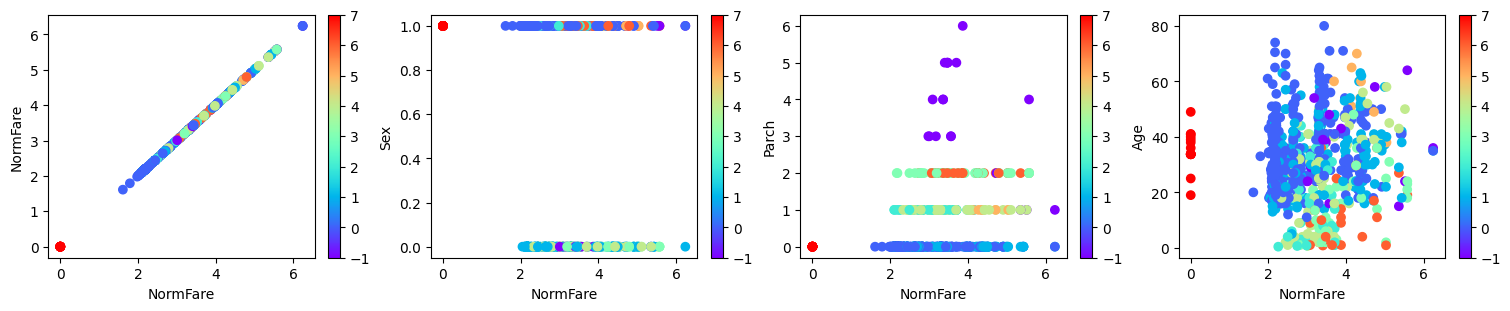

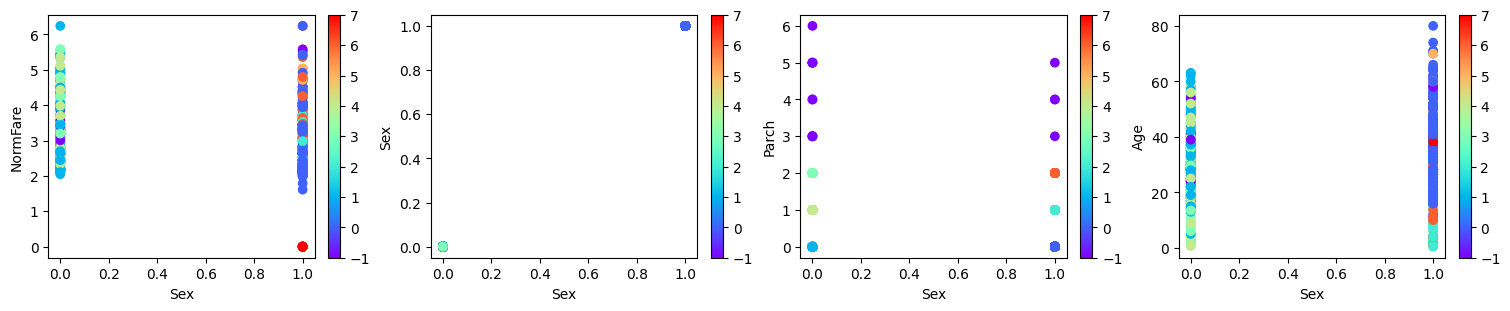

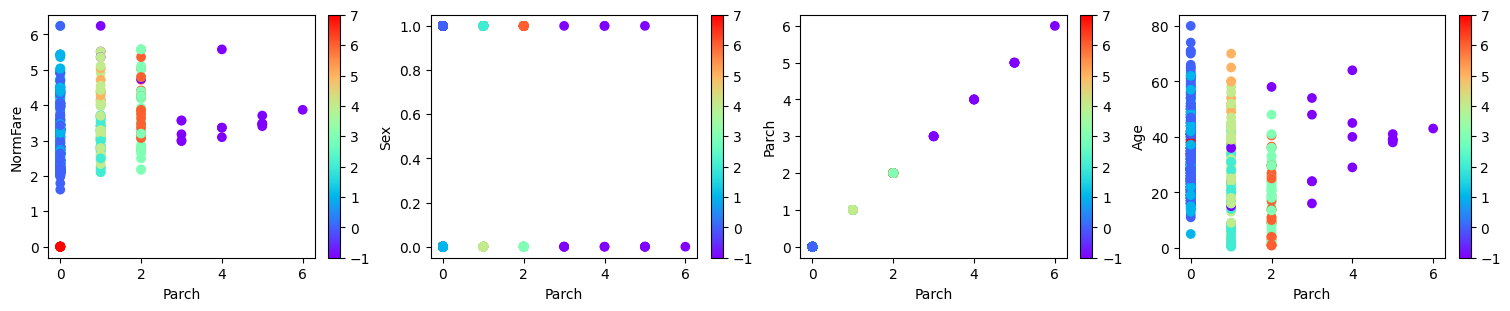

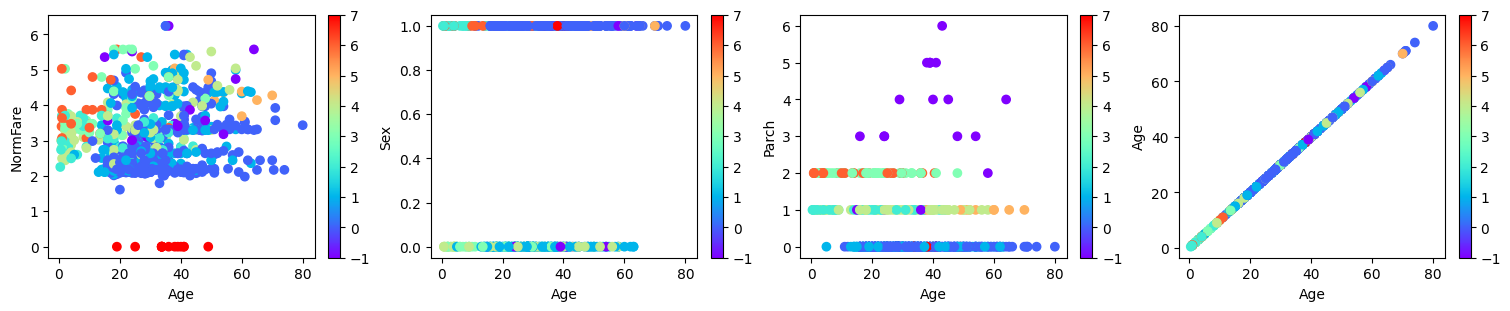

In [141]:
dbcsan_clustering(eps=1)

Eps = 2
MSE:  0.2166105499438833
Accuracy score:  0.7833894500561167
Confusion matrix:
 [[  0   0   0]
 [  3 465  81]
 [  0 109 233]]




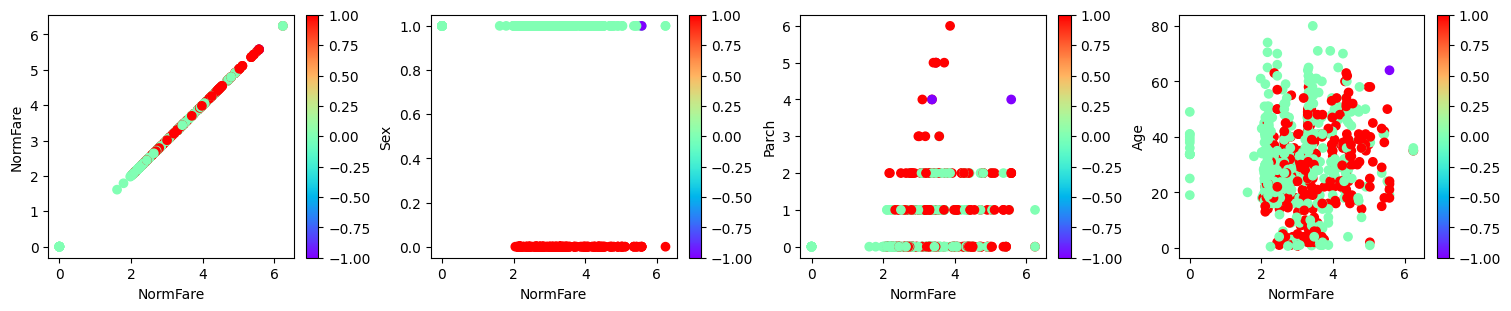

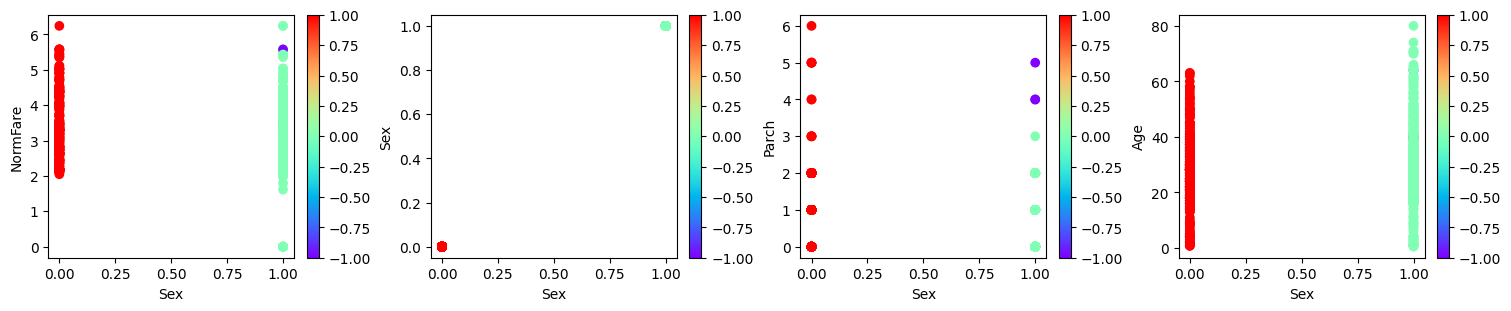

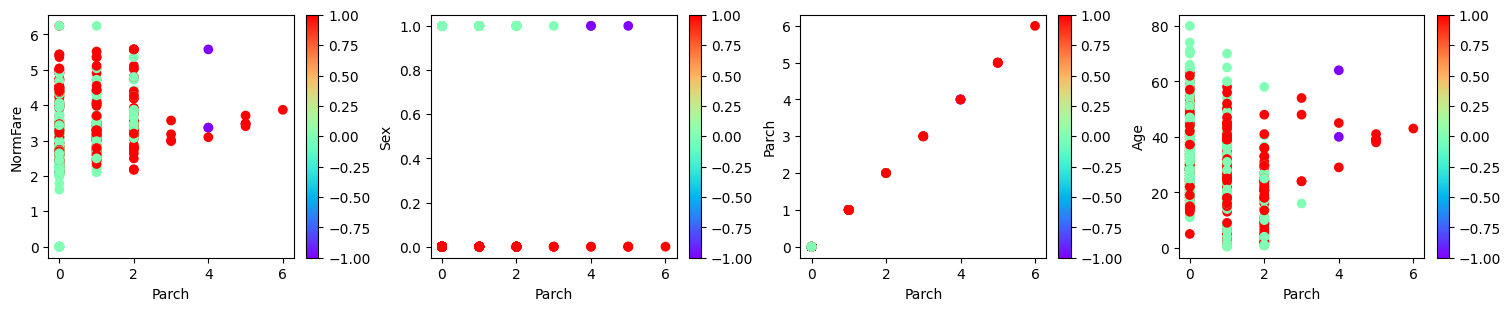

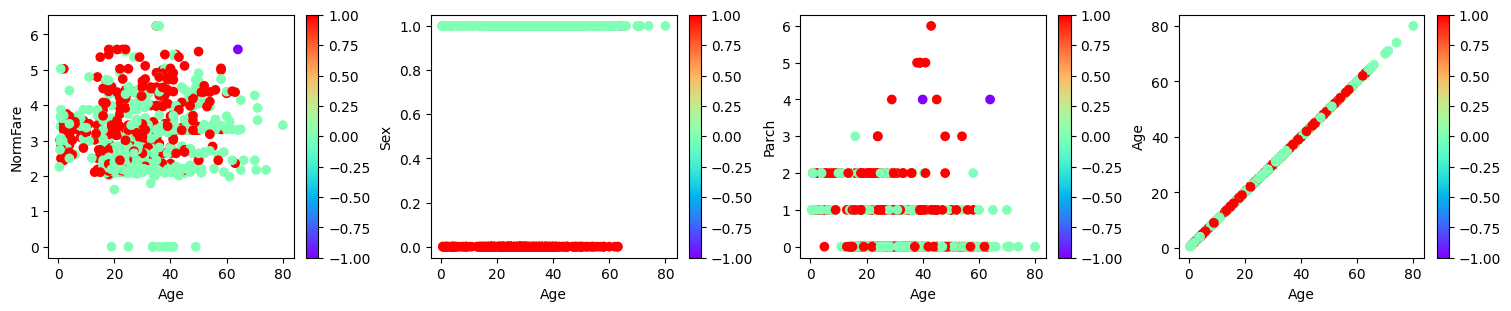

In [142]:
dbcsan_clustering(eps=2)

Eps = 3
MSE:  0.3838383838383838
Accuracy score:  0.6161616161616161
Confusion matrix:
 [[549   0]
 [342   0]]




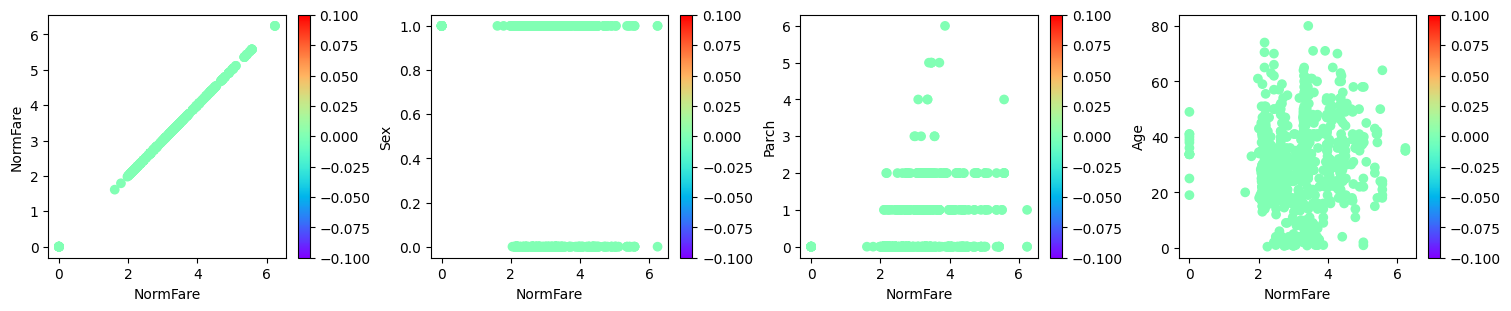

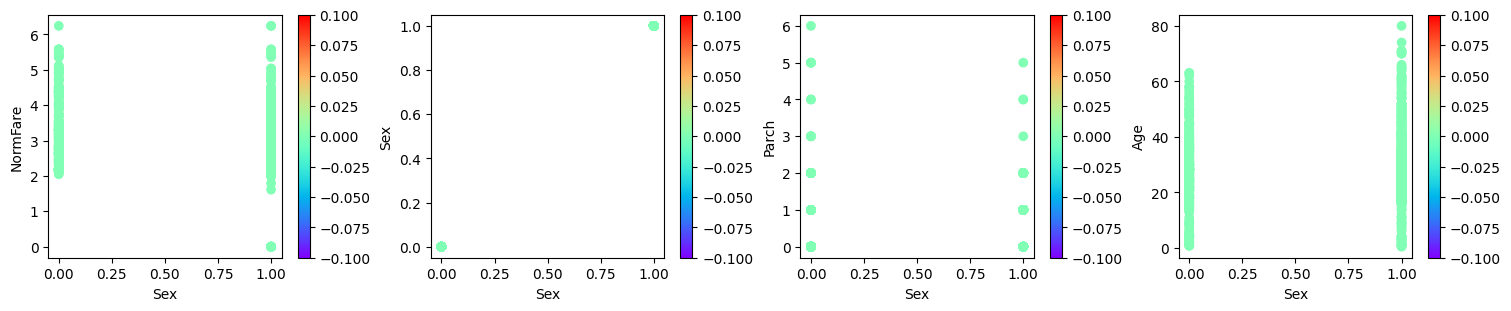

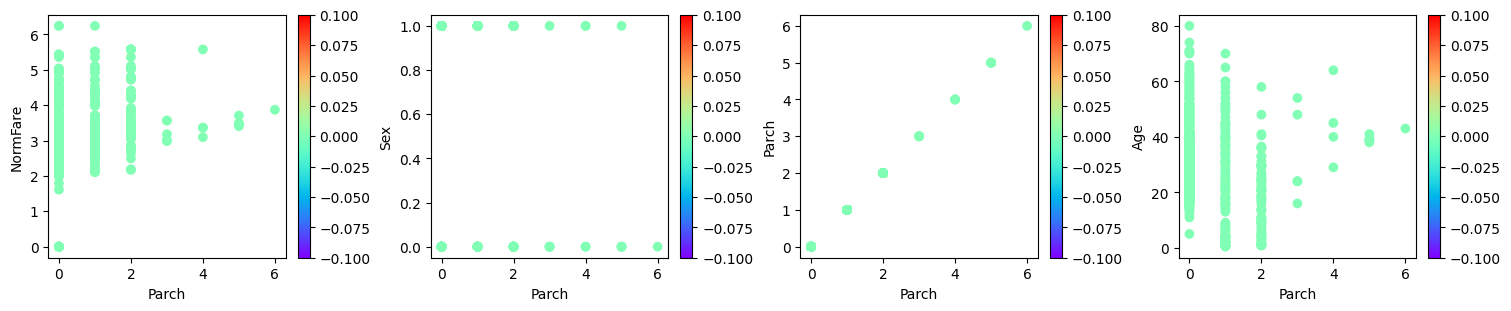

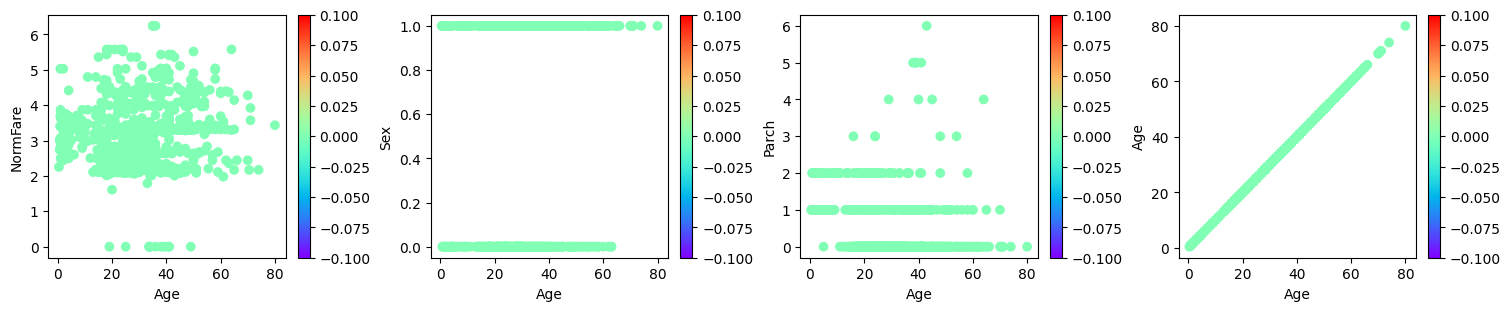

In [143]:
dbcsan_clustering(eps=3)

Результат кластеризації за допомогою $DBSCAN$ дуже залежить від параметру eps, що визначає радіус для пошуку точок, які будуть належати кластеру.

На наведених діаграмах видно, що коли $eps=1$, то кластерів виходить багато. Через невеликий $eps$ та частина точок, які не попадають у один кластер утворюють інший. Таких груп стає більше.

Коли eps завеликий (у даному випадку $eps=3$), то, навпаки, всі точки потрапляють у один кластер, оскільки кола, описані радіусами всіх точок, перекривають всі точки.

Найкращим виявився $eps=2$. Є $3$ точки, які не потрапили ні в перший, ні в другий кластер. Це рядки, які мають рідкісну комбінацію значень фітч (Пасажири чоловічої статі, середнього віку та з квитком для першого класу. До речі ці значення співпадають з значеннями у агломеративній кластеризації з параметром $single$).

Також використовуючи різні параметри методу $DBSCAN$ можна виявляти нові залежності між фітчами та знаходити нові групи у даних. 